In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("book_sales.csv.csv",index_col='Date',parse_dates=['Date']).drop(['Paperback'],axis=1)

In [3]:
df.head()

Hardcover
Date                 
2000-04-01        139
2000-04-02        128
2000-04-03        172
2000-04-04        139
2000-04-05        191

In [4]:
df.index

DatetimeIndex(['2000-04-01', '2000-04-02', '2000-04-03', '2000-04-04',
               '2000-04-05', '2000-04-06', '2000-04-07', '2000-04-08',
               '2000-04-09', '2000-04-10', '2000-04-11', '2000-04-12',
               '2000-04-13', '2000-04-14', '2000-04-15', '2000-04-16',
               '2000-04-17', '2000-04-18', '2000-04-19', '2000-04-20',
               '2000-04-21', '2000-04-22', '2000-04-23', '2000-04-24',
               '2000-04-25', '2000-04-26', '2000-04-27', '2000-04-28',
               '2000-04-29', '2000-04-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

> 2 types of features :
    >>1. time step feature
    >>2. lag feature

time-step feature is the time dummy, which counts off time steps in the series from beginning to end

In [5]:
df['Time']=np.arange(len(df.index))
df.head()

Hardcover  Time
Date                       
2000-04-01        139     0
2000-04-02        128     1
2000-04-03        172     2
2000-04-04        139     3
2000-04-05        191     4

In [6]:
# Target = weight *time +bias

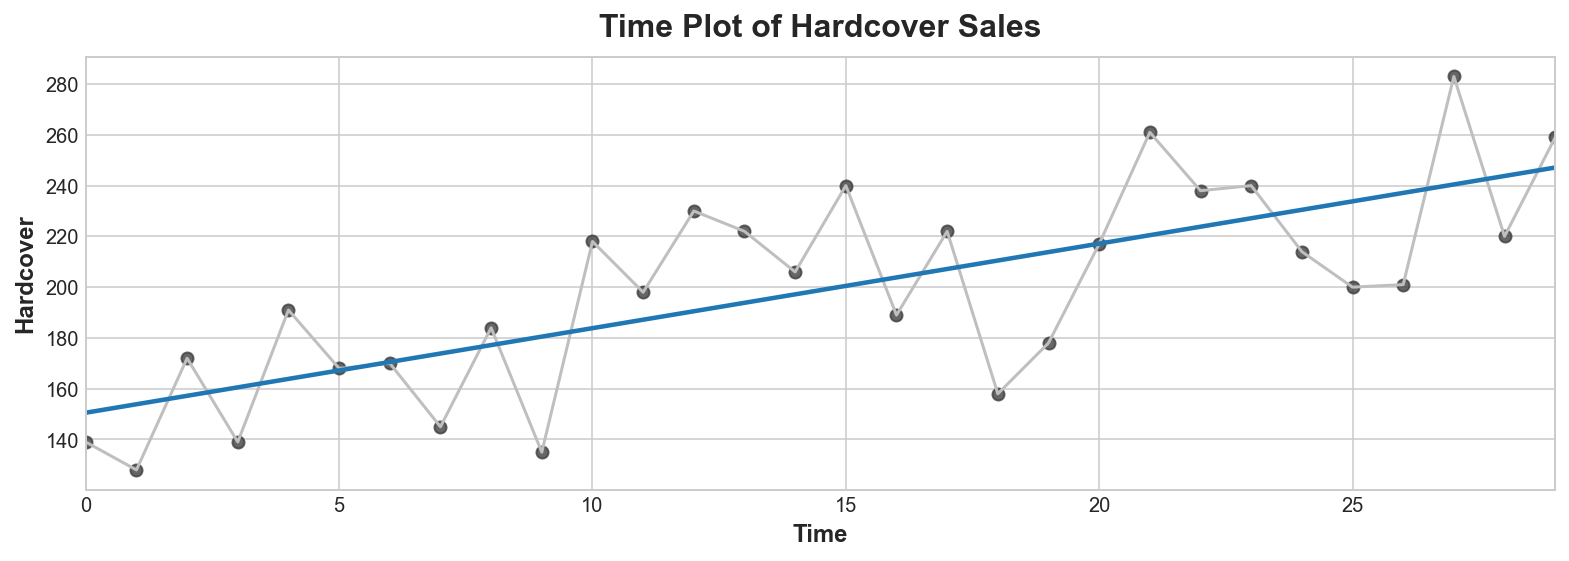

In [7]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'
fig,ax=plt.subplots()
ax.plot('Time','Hardcover',data=df,color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))

ax.set_title('Time Plot of Hardcover Sales');


Time-step features let you model `time dependence`. A series is time dependent if its values can be predicted from the time they occured. In the Hardcover Sales series, we can predict that sales later in the month are generally higher than sales earlier in the month.

# Lag features
To make a lag feature we shift the observations of the target series so that they appear to have occured later in time

In [8]:
df['Lag_1']=df['Hardcover'].shift(1)
df=df.reindex(columns=['Hardcover','Lag_1'])

In [9]:
df.head()

Hardcover  Lag_1
Date                        
2000-04-01        139    NaN
2000-04-02        128  139.0
2000-04-03        172  128.0
2000-04-04        139  172.0
2000-04-05        191  139.0

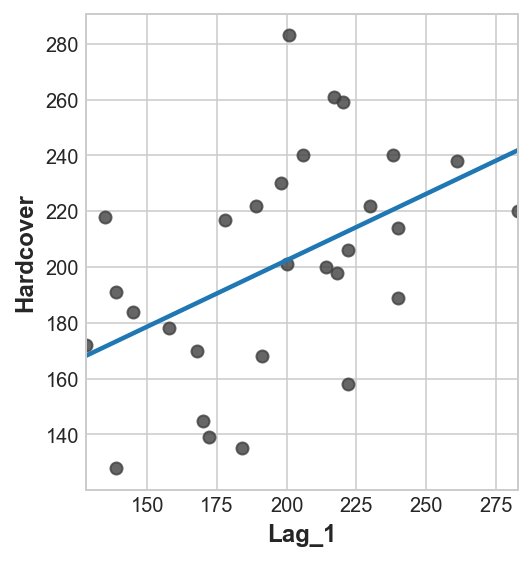

In [10]:
fig,ax=plt.subplots()
ax=sns.regplot(x='Lag_1',y='Hardcover',data=df,ci=None,scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')

there is correlation so lag_1 is useful


In [11]:
df.corr()

Hardcover     Lag_1
Hardcover   1.000000  0.475708
Lag_1       0.475708  1.000000

>
More generally, lag features let you model `serial dependence`. A time series has serial dependence when an observation can be predicted from previous observations. In Hardcover Sales, we can predict that high sales on one day usually mean high sales the next day.



***

In [12]:
df=pd.read_csv("F:\\mohamed\\Machine Learning 2\\time series\\tunnel.csv.csv",parse_dates=["Day"])

In [13]:
df=df.set_index('Day')

In [14]:
df=df.to_period()

In [15]:
df.head()

NumVehicles
Day                    
2003-11-01       103536
2003-11-02        92051
2003-11-03       100795
2003-11-04       102352
2003-11-05       106569

In [16]:
df.index

PeriodIndex(['2003-11-01', '2003-11-02', '2003-11-03', '2003-11-04',
             '2003-11-05', '2003-11-06', '2003-11-07', '2003-11-08',
             '2003-11-09', '2003-11-10',
             ...
             '2005-11-07', '2005-11-08', '2005-11-09', '2005-11-10',
             '2005-11-11', '2005-11-12', '2005-11-13', '2005-11-14',
             '2005-11-15', '2005-11-16'],
            dtype='period[D]', name='Day', length=747, freq='D')

In [17]:
df['Time']=np.arange(len(df.index))
df.head()

NumVehicles  Time
Day                          
2003-11-01       103536     0
2003-11-02        92051     1
2003-11-03       100795     2
2003-11-04       102352     3
2003-11-05       106569     4

In [18]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'NumVehicles']  # target
# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [19]:
y_pred

Day
2003-11-01     98176.206344
2003-11-02     98198.703794
2003-11-03     98221.201243
2003-11-04     98243.698693
2003-11-05     98266.196142
                  ...      
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Freq: D, Length: 747, dtype: float64

In [20]:
model.coef_

array([22.49744953])

In [21]:
model.intercept_

98176.20634409295

In [22]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

NumVehicles  Time     Lag_1
Day                                    
2003-11-01       103536     0       NaN
2003-11-02        92051     1  103536.0
2003-11-03       100795     2   92051.0
2003-11-04       102352     3  100795.0
2003-11-05       106569     4  102352.0

In [23]:
df.dropna(axis=0,inplace=True)

In [24]:
X = df.loc[:, ['Lag_1']]
y = df.loc[:, 'NumVehicles']  # create the target

In [25]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

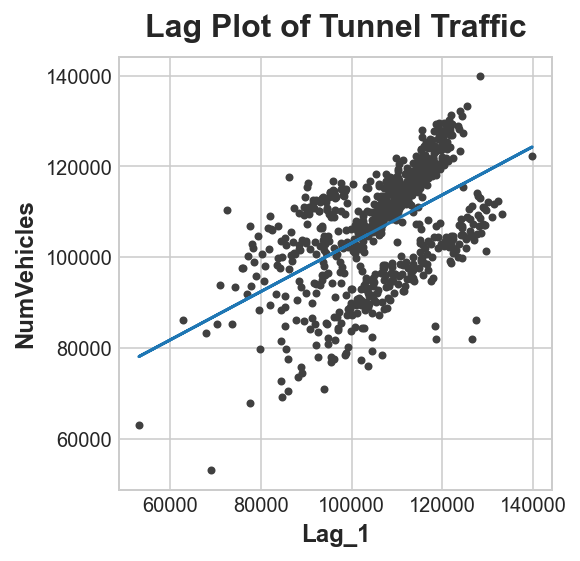

In [26]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

In [27]:
# Trend

the long term change in mean of the series 
slowest moving part in the series

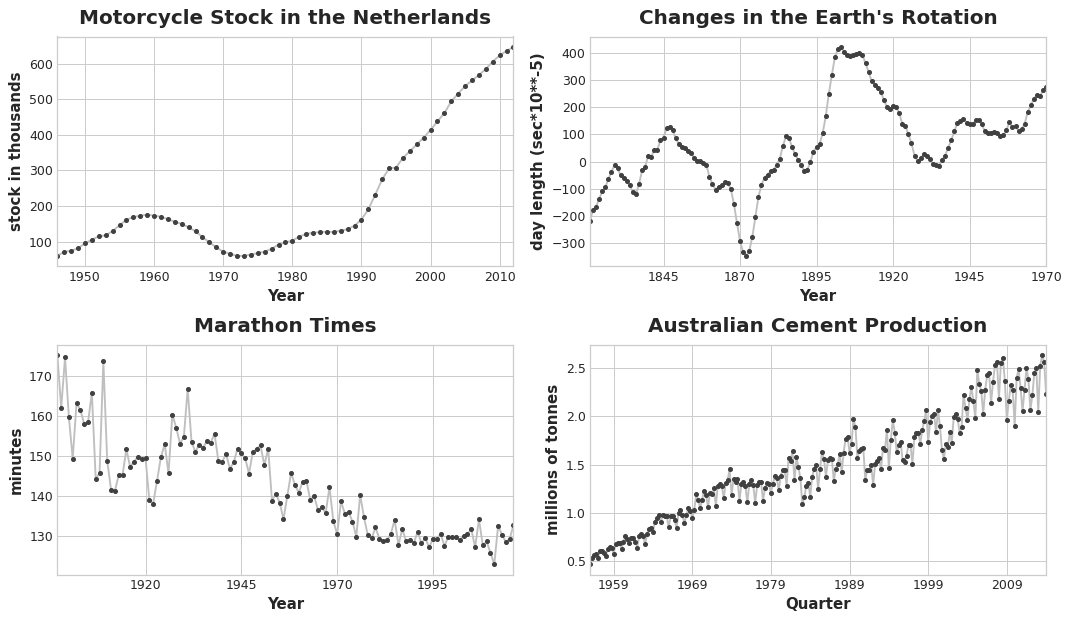

Moving average 
technique used for smoothing signlas and preserve low freqs


here we use mob=ving average 
we compute avergae of values within sliding window
so we can s mooth out or remove any short term fluctuatons in the series so that only long ter chnages remain

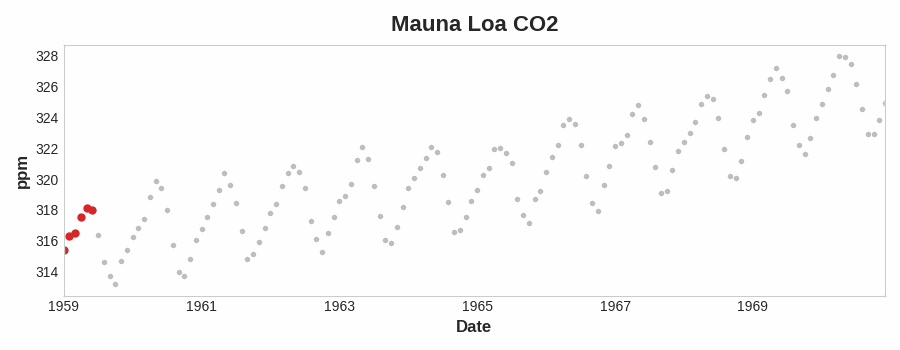

here we have window of 12 point 
the blue line represents averages

In [28]:
tunnel=pd.read_csv("F:\\mohamed\\Machine Learning 2\\time series\\tunnel.csv.csv",index_col='Day',parse_dates=["Day"])

In [29]:
tunnel=tunnel.to_period()

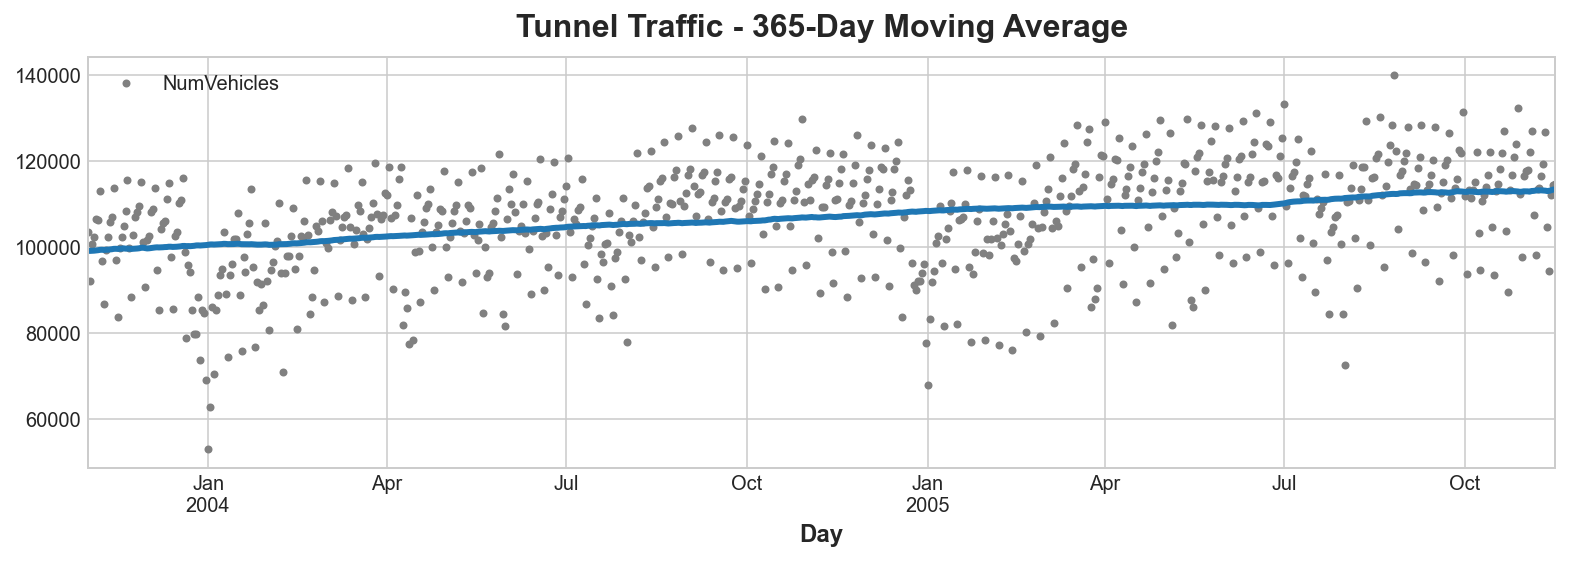

In [30]:
moving_average = tunnel.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = tunnel.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
);

'''

perviously we used time step feature by pandas 
from now on ,
we'll use a function from the statsmodels library called DeterministicProcess

Using this function will help us avoid some tricky failure cases that can arise with time series and linear regression. The order argument refers to polynomial order: 1 for linear, 2 for quadratic, 3 for cubic, and so on.


In [31]:
tunnel.head()

NumVehicles
Day                    
2003-11-01       103536
2003-11-02        92051
2003-11-03       100795
2003-11-04       102352
2003-11-05       106569

In [32]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp=DeterministicProcess(index=tunnel.index,
                       constant=True, # bias to be a feature
                       order=1, #ime feature / Trend
                       drop=True) # drop terms if necessary to avoid collinearity

In [34]:
x=dp.in_sample()
x.head()

const  trend
Day                     
2003-11-01    1.0    1.0
2003-11-02    1.0    2.0
2003-11-03    1.0    3.0
2003-11-04    1.0    4.0
2003-11-05    1.0    5.0

In [35]:
y = tunnel["NumVehicles"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(x, y)

y_pred = pd.Series(model.predict(x), index=x.index)

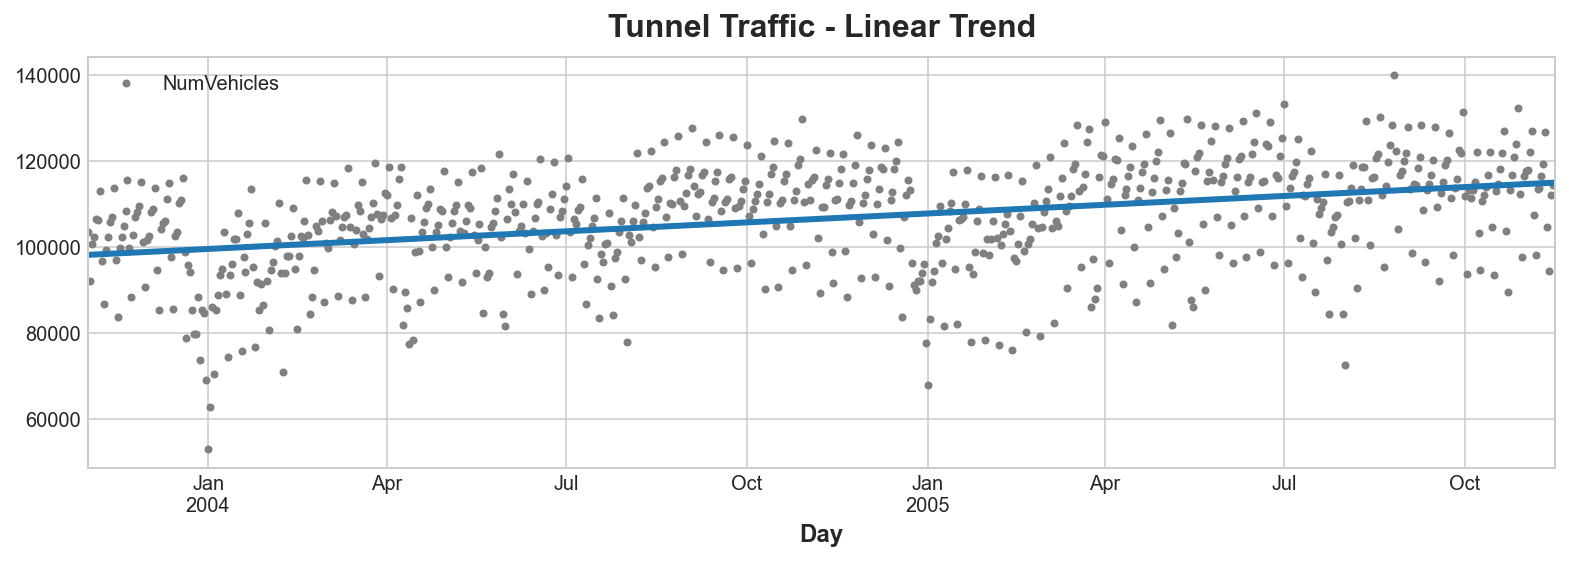

In [36]:
ax = tunnel.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

To make a forecast, we apply our model to "out of sample" features.
"Out of sample" refers to times outside of the observation period of the training data.
Here's how we could make a 30-day forecast:

In [37]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)

y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

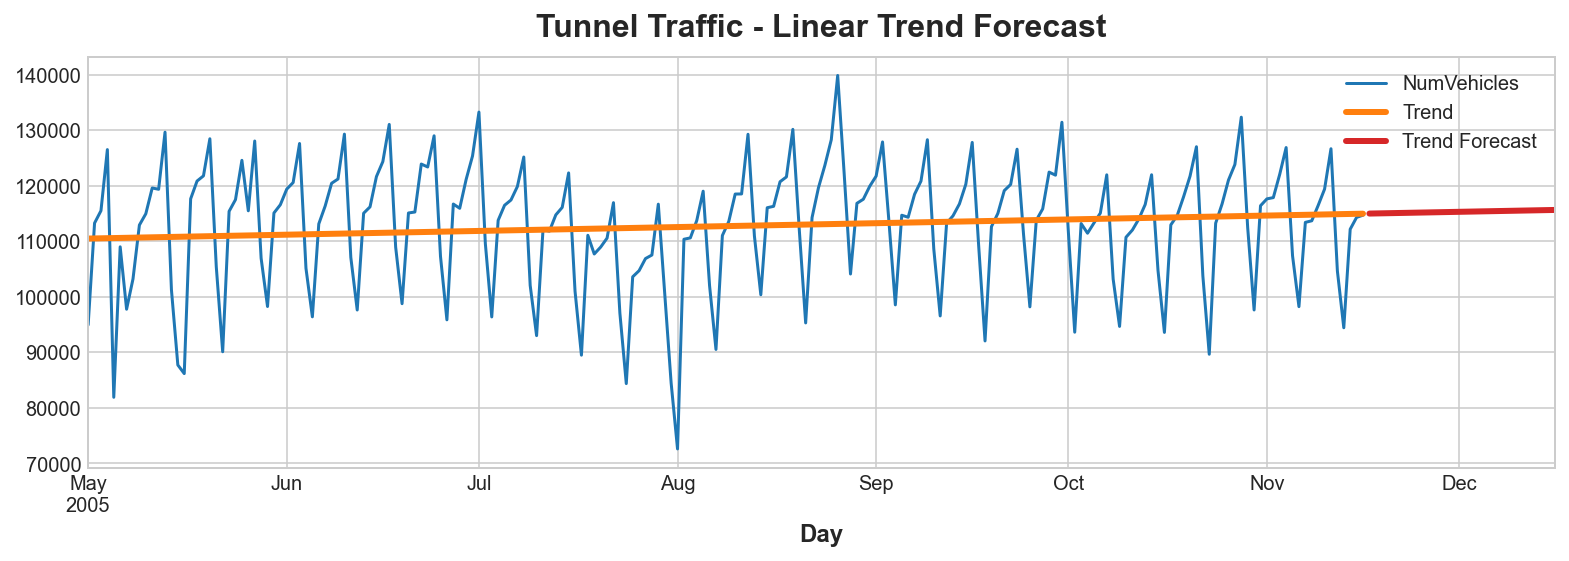

In [38]:
from pandas.plotting import plot_params

ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast")
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

***

# Seasonality
We say that a time series exhibits seasonality whenever there is a regular, periodic change in the mean of the series.

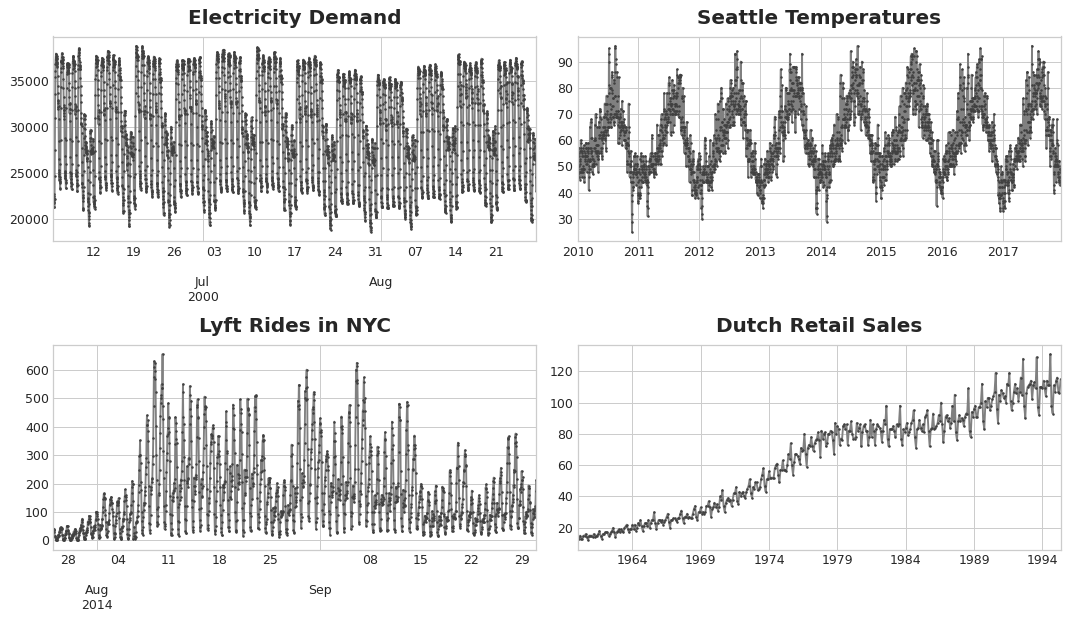

We will learn two kinds of features that model seasonality. The first kind, indicators, is best for a season with few observations, like a weekly season of daily observations

The second kind, Fourier features, is best for a season with many observations, like an annual season of daily observations.

seasonal indicators 
like you have applied one hot encoding
and add the resultant features to train 

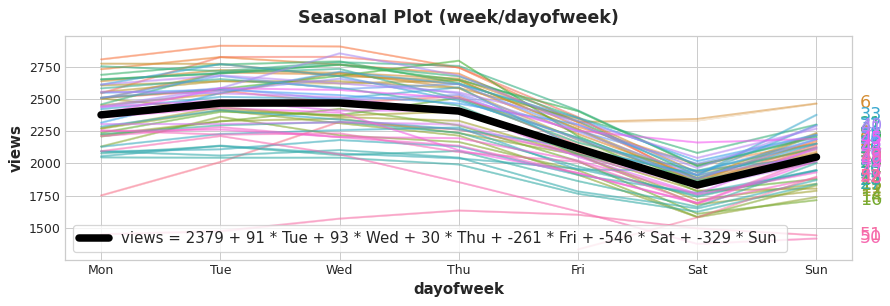

Fourier features
in last you can observe and know the feature 
here there is a repeated frequency ,that we try to capture for Fourier features


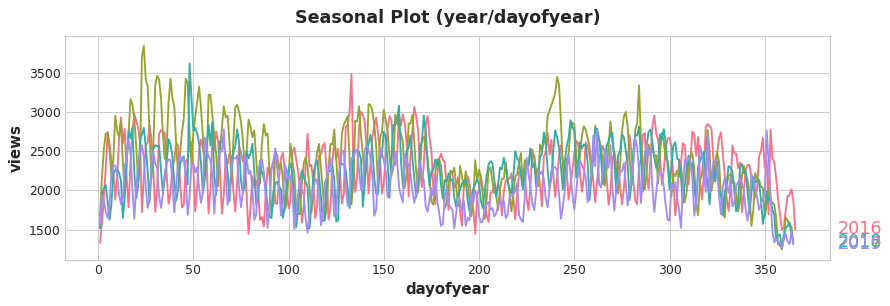

Fourier features are pairs of sine and cosine curves, one pair for each potential frequency in the season starting with the longest. Fourier pairs modeling annual seasonality would have frequencies: once per year, twice per year, three times per year, and so on

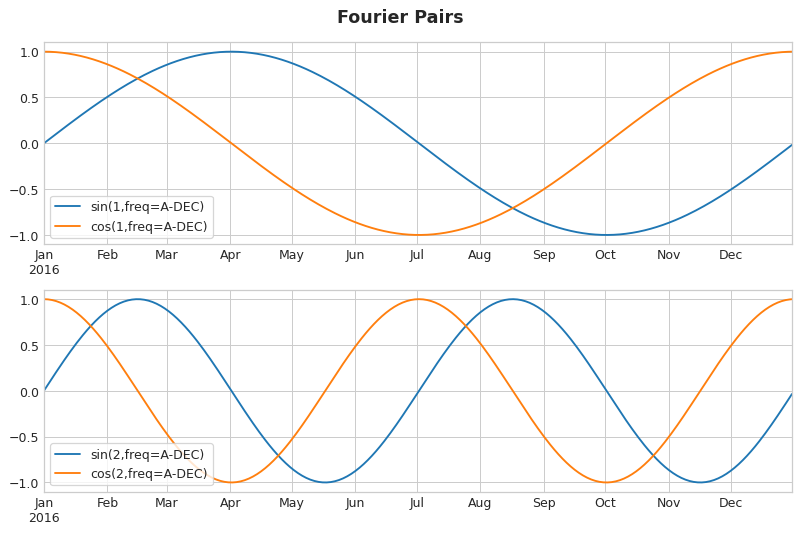

if we add a set of these sine / cosine curves to our training data, the linear regression algorithm will figure out the weights that will fit the seasonal component in the target series. The figure illustrates how linear regression used four Fourier pairs to model the annual seasonality in the Wiki Trigonometry series.



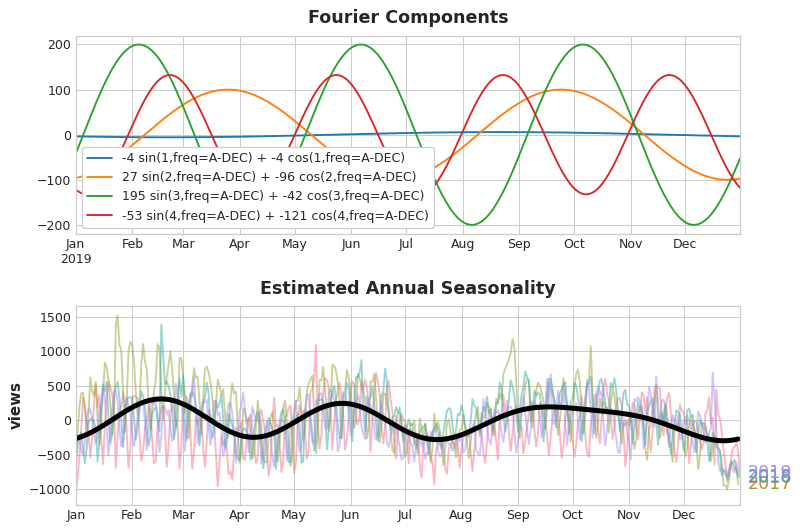

Top: Curves for four Fourier pairs, a sum of sine and cosine with regression coefficients. Each curve models a different frequency. Bottom: The sum of these curves approximates the seasonal pattern.

4 features

Notice that we only needed eight features (four sine / cosine pairs) to get a good estimate of the annual seasonality. Compare this to the seasonal indicator method which would have required hundreds of features (one for each day of the year). By modeling only the "main effect" of the seasonality with Fourier features, you'll usually need to add far fewer features to your training data, which means reduced computation time and less risk of overfitting.

In [39]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

import warnings

warnings.filterwarnings("ignore")

In [40]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


tunnel = pd.read_csv("F:\\mohamed\\Machine Learning 2\\time series\\tunnel.csv.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")

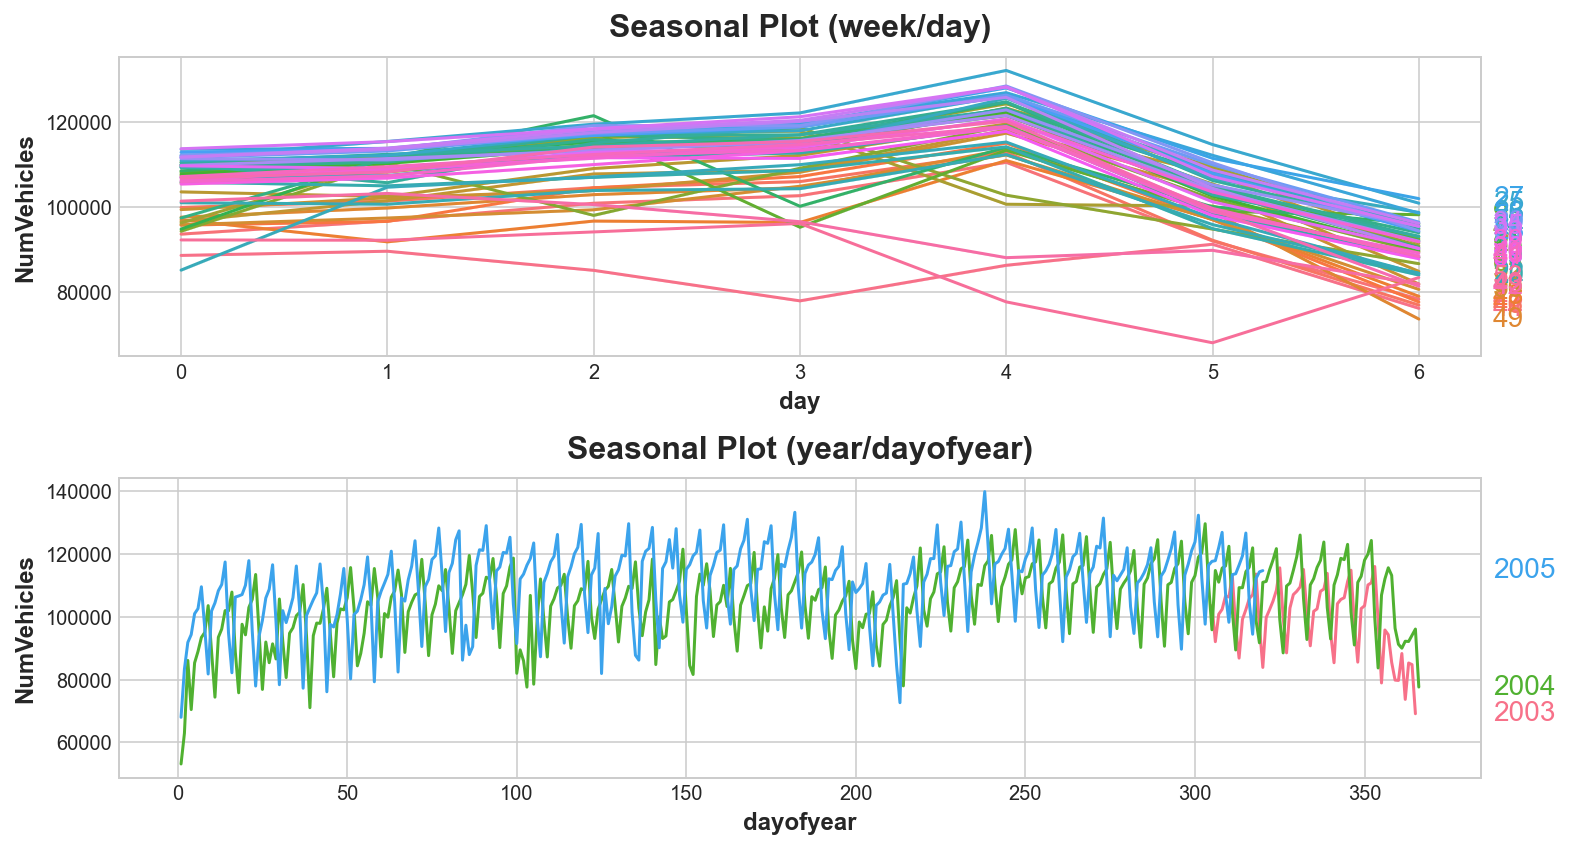

In [41]:
X = tunnel.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1);

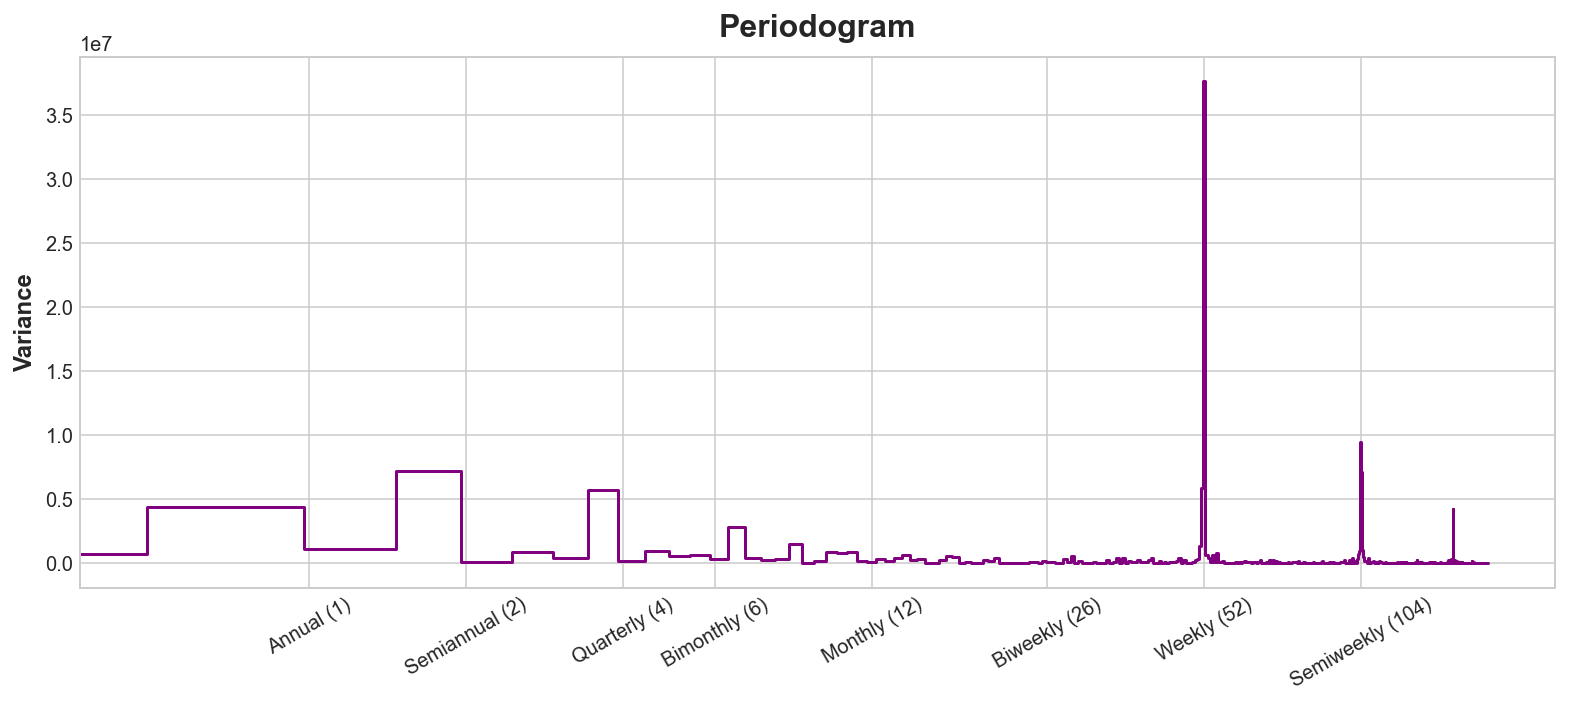

In [42]:
plot_periodogram(tunnel.NumVehicles);

The periodogram agrees with the seasonal plots above: a strong weekly season and a weaker annual season. The weekly season we'll model with indicators and the annual season with Fourier features. From right to left, the periodogram falls off between Bimonthly (6) and Monthly (12), so let's use 10 Fourier pairs.

We'll create our seasonal features using DeterministicProcess, the same utility we used in Lesson 2 to create trend features. To use two seasonal periods (weekly and annual), we'll need to instantiate one of them as an "additional term":

In [43]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index


In [44]:
X

const  trend  s(2,7)  s(3,7)  s(4,7)  s(5,7)  s(6,7)  s(7,7)  \
Day                                                                        
2003-11-01    1.0    1.0     0.0     0.0     0.0     0.0     0.0     0.0   
2003-11-02    1.0    2.0     1.0     0.0     0.0     0.0     0.0     0.0   
2003-11-03    1.0    3.0     0.0     1.0     0.0     0.0     0.0     0.0   
2003-11-04    1.0    4.0     0.0     0.0     1.0     0.0     0.0     0.0   
2003-11-05    1.0    5.0     0.0     0.0     0.0     1.0     0.0     0.0   
...           ...    ...     ...     ...     ...     ...     ...     ...   
2005-11-12    1.0  743.0     0.0     0.0     0.0     0.0     0.0     0.0   
2005-11-13    1.0  744.0     1.0     0.0     0.0     0.0     0.0     0.0   
2005-11-14    1.0  745.0     0.0     1.0     0.0     0.0     0.0     0.0   
2005-11-15    1.0  746.0     0.0     0.0     1.0     0.0     0.0     0.0   
2005-11-16    1.0  747.0     0.0     0.0     0.0     1.0     0.0     0.0   

            sin(1,freq=A-DEC)  cos(1,freq=A-DEC)  ...  sin(6,freq=A-DEC)  \
Day                                               ...                      
2003-11-01          -0.867456           0.497513  ...          -0.017213   
2003-11-02          -0.858764           0.512371  ...           0.085965   
2003-11-03          -0.849817           0.527078  ...           0.188227   
2003-11-04          -0.840618           0.541628  ...           0.288482   
2003-11-05          -0.831171           0.556017  ...           0.385663   
...                       ...                ...  ...                ...   
2005-11-12          -0.758306           0.651899  ...           0.899631   
2005-11-13          -0.746972           0.664855  ...           0.939856   
2005-11-14          -0.735417           0.677615  ...           0.970064   
2005-11-15          -0.723644           0.690173  ...           0.989932   
2005-11-16          -0.711657           0.702527  ...           0.999250   

            cos(6,freq=A-DEC)  sin(7,freq=A-DEC)  cos(7,freq=A-DEC)  \
Day                                                                   
2003-11-01           0.999852          -0.875892           0.482508   
2003-11-02           0.996298          -0.811539           0.584298   
2003-11-03           0.982126          -0.735417           0.677615   
2003-11-04           0.957485          -0.648630           0.761104   
2003-11-05           0.922640          -0.552435           0.833556   
...                       ...                ...                ...   
2005-11-12           0.436651           0.255353           0.966848   
2005-11-13           0.341571           0.369725           0.929141   
2005-11-14           0.242850           0.478734           0.877960   
2005-11-15           0.141540           0.580800           0.814046   
2005-11-16           0.038722           0.674444           0.738326   

            sin(8,freq=A-DEC)  cos(8,freq=A-DEC)  sin(9,freq=A-DEC)  \
Day                                                                   
2003-11-01          -0.854322          -0.519744           0.025818   
2003-11-02          -0.917584          -0.397543          -0.128748   
2003-11-03          -0.963471          -0.267814          -0.280231   
2003-11-04          -0.991114          -0.133015          -0.425000   
2003-11-05          -0.999991           0.004304          -0.559589   
...                       ...                ...                ...   
2005-11-12          -0.566702           0.823923          -0.994218   
2005-11-13          -0.448229           0.893919          -0.965740   
2005-11-14          -0.321270           0.946988          -0.914128   
2005-11-15          -0.188227           0.982126          -0.840618   
2005-11-16          -0.051620           0.998667          -0.746972   

            cos(9,freq=A-DEC)  sin(10,freq=A-DEC)  cos(10,freq=A-DEC)  
Day                                                                    
2003-11-01          -0.999667            0

With our feature set created, we're ready to fit the model and make predictions. We'll add a 90-day forecast to see how our model extrapolates beyond the training data. The code here is the same as that in earlier lessons.

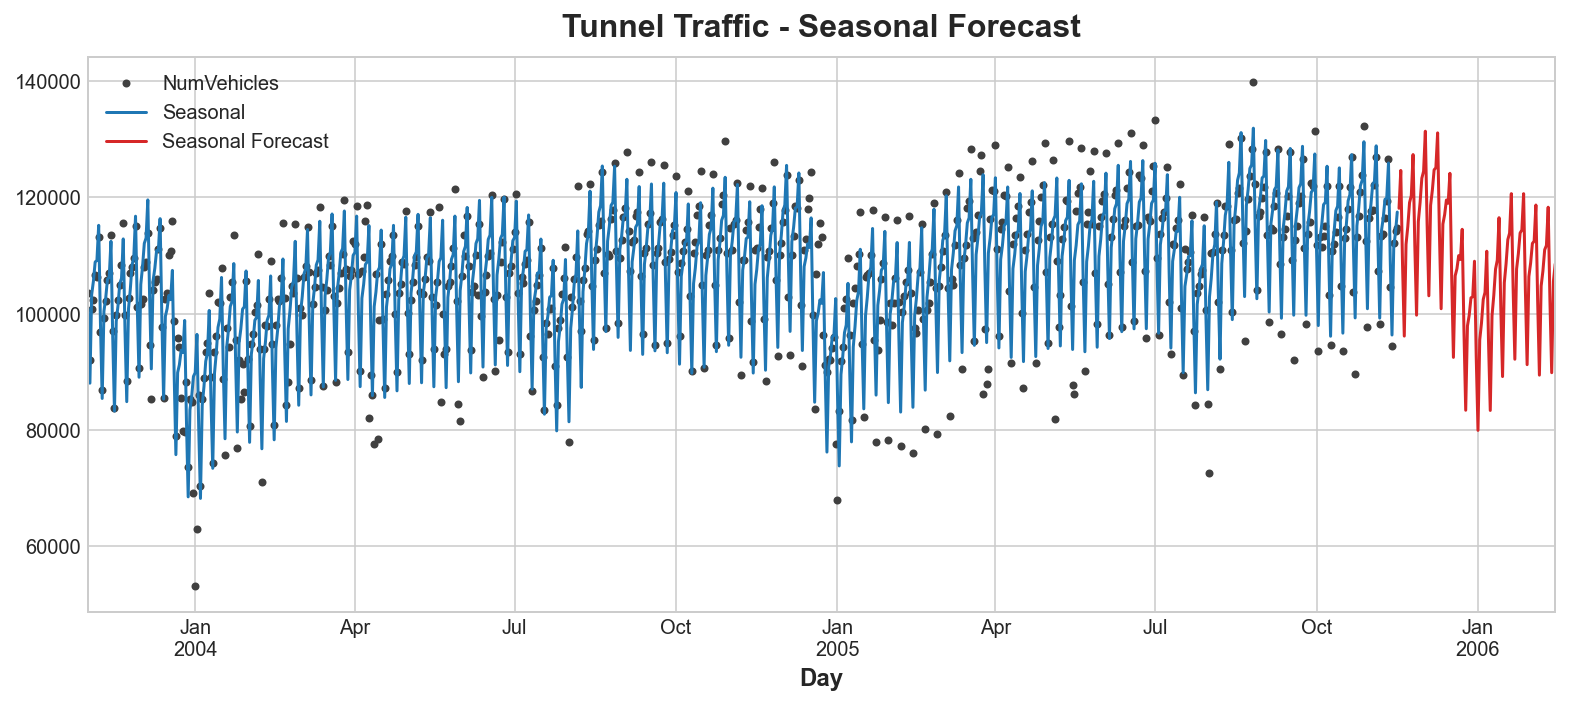

In [45]:
y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

In [46]:
tunnel

NumVehicles
Day                    
2003-11-01       103536
2003-11-02        92051
2003-11-03       100795
2003-11-04       102352
2003-11-05       106569
...                 ...
2005-11-12       104646
2005-11-13        94424
2005-11-14       112165
2005-11-15       114296
2005-11-16       114690

[747 rows x 1 columns]

In [47]:
y_pred

Day
2003-11-01    100825.606121
2003-11-02     88044.824807
2003-11-03    103257.922484
2003-11-04    105590.372316
2003-11-05    108884.019433
                  ...      
2005-11-12    109267.936685
2005-11-13     96329.179864
2005-11-14    111512.397065
2005-11-15    113947.054527
2005-11-16    117475.267819
Freq: D, Length: 747, dtype: float64

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(tunnel['NumVehicles'],y_pred)

0.794932609919132

In [49]:
mean_squared_error(tunnel['NumVehicles'],y_pred,squared=False)

5637.002592739749

***

In [50]:
df=pd.read_csv("F:\\mohamed\\Machine Learning 2\\time series\\flu-trends.csv.csv")


In [51]:
df.head()

Week  AInfluenza  AcuteBronchitis  BodyTemperature  \
0  2009-06-29/2009-07-05          36               20               43   
1  2009-07-06/2009-07-12          25               19               40   
2  2009-07-13/2009-07-19          24               30               45   
3  2009-07-20/2009-07-26          23               19               40   
4  2009-07-27/2009-08-02          27               21               44   

   BraunThermoscan  BreakAFever  Bronchitis  ChestCold  ColdAndFlu  ColdOrFlu  \
0               27           11          22         16           7          3   
1               31           10          21         11           6          8   
2               20           12          20         20           6          6   
3               15           10          19         12           7         10   
4               20           11          19         17           8         10   

   ...  TreatingTheFlu  TreatmentForFlu  TreatmentForTheFlu  Tussin  \
0  ...              16                6                  13      25   
1  ...              16                7                   8      27   
2  ...              16                6                   9      24   
3  ...               8                5                  12      21   
4  ...               8                8                  12      33   

   Tussionex  TypeAInfluenza  UpperRespiratory  WalkingPneumonia  \
0         34              30                25                24   
1         32              27                28                29   
2         28              25                25                25   
3         26              26                29                24   
4         29              21                27                30   

   WhatToDoIfYouHaveTheFlu  FluVisits  
0                       15        180  
1                        9        115  
2                        9        132  
3                       13        109  
4                        9        120  

[5 rows x 131 columns]

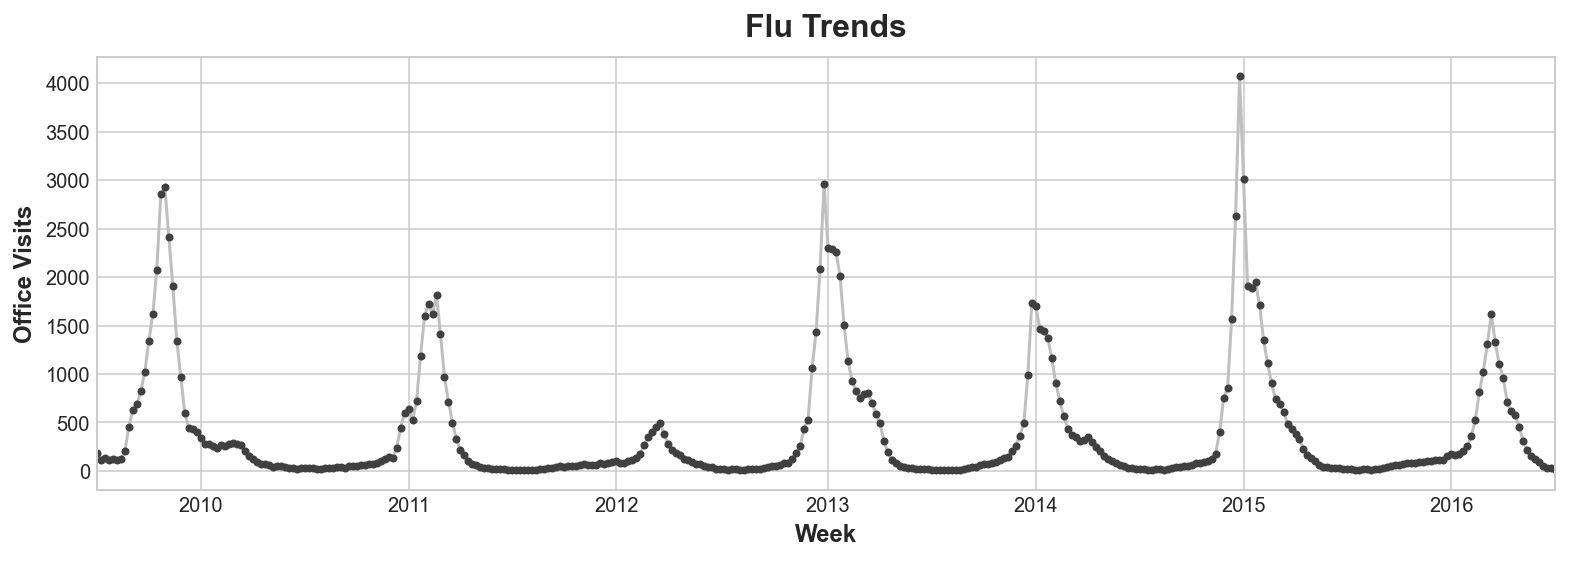

In [160]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


df=pd.read_csv("F:\\mohamed\\Machine Learning 2\\time series\\flu-trends.csv.csv")
flu_trends = df
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")

In [161]:
flu_trends

AInfluenza  AcuteBronchitis  BodyTemperature  \
Week                                                                  
2009-06-29/2009-07-05          36               20               43   
2009-07-06/2009-07-12          25               19               40   
2009-07-13/2009-07-19          24               30               45   
2009-07-20/2009-07-26          23               19               40   
2009-07-27/2009-08-02          27               21               44   
...                           ...              ...              ...   
2016-05-30/2016-06-05           5               46               50   
2016-06-06/2016-06-12           5               47               49   
2016-06-13/2016-06-19           4               47               48   
2016-06-20/2016-06-26           3               47               51   
2016-06-27/2016-07-03           3               48               49   

                       BraunThermoscan  BreakAFever  Bronchitis  ChestCold  \
Week                                                                         
2009-06-29/2009-07-05               27           11          22         16   
2009-07-06/2009-07-12               31           10          21         11   
2009-07-13/2009-07-19               20           12          20         20   
2009-07-20/2009-07-26               15           10          19         12   
2009-07-27/2009-08-02               20           11          19         17   
...                                ...          ...         ...        ...   
2016-05-30/2016-06-05               29           31          37         33   
2016-06-06/2016-06-12               21           24          36         35   
2016-06-13/2016-06-19               21           22          34         32   
2016-06-20/2016-06-26               26           24          31         35   
2016-06-27/2016-07-03               26           23          31         29   

                       ColdAndFlu  ColdOrFlu  ColdVersusFlu  ...  \
Week                                                         ...   
2009-06-29/2009-07-05           7          3              8  ...   
2009-07-06/2009-07-12           6          8              8  ...   
2009-07-13/2009-07-19           6          6              8  ...   
2009-07-20/2009-07-26           7         10             15  ...   
2009-07-27/2009-08-02           8         10             15  ...   
...                           ...        ...            ...  ...   
2016-05-30/2016-06-05          17          9              3  ...   
2016-06-06/2016-06-12          19          8              4  ...   
2016-06-13/2016-06-19          15          8              3  ...   
2016-06-20/2016-06-26          15          7              4  ...   
2016-06-27/2016-07-03          17          5              4  ...   

                       TreatingTheFlu  TreatmentForFlu  TreatmentForTheFlu  \
Week                                                                         
2009-06-29/2009-07-05              16                6                  13   
2009-07-06/2009-07-12              16                7                   8   
2009-07-13/2009-07-19              16                6                   9   
2009-07-20/2009-07-26               8                5                  12   
2009-07-27/2009-08-02               8                8                  12   
...                               ...              ...                 ...   
2016-05-30/2016-06-05               7                3                   6   
2016-06-06/2016-06-12               5                3                   5   
2016-06-13/2016-06-19               6                2                   6   
2016-06-20/2016-06-26               3                3                   6   
2016-06-27/2016-07-03               3                2                   3   

                       Tussin  Tussionex  TypeAInfluenza  UpperRespiratory  \
Week                                                                         
2009-06-29/2009-07-05      2

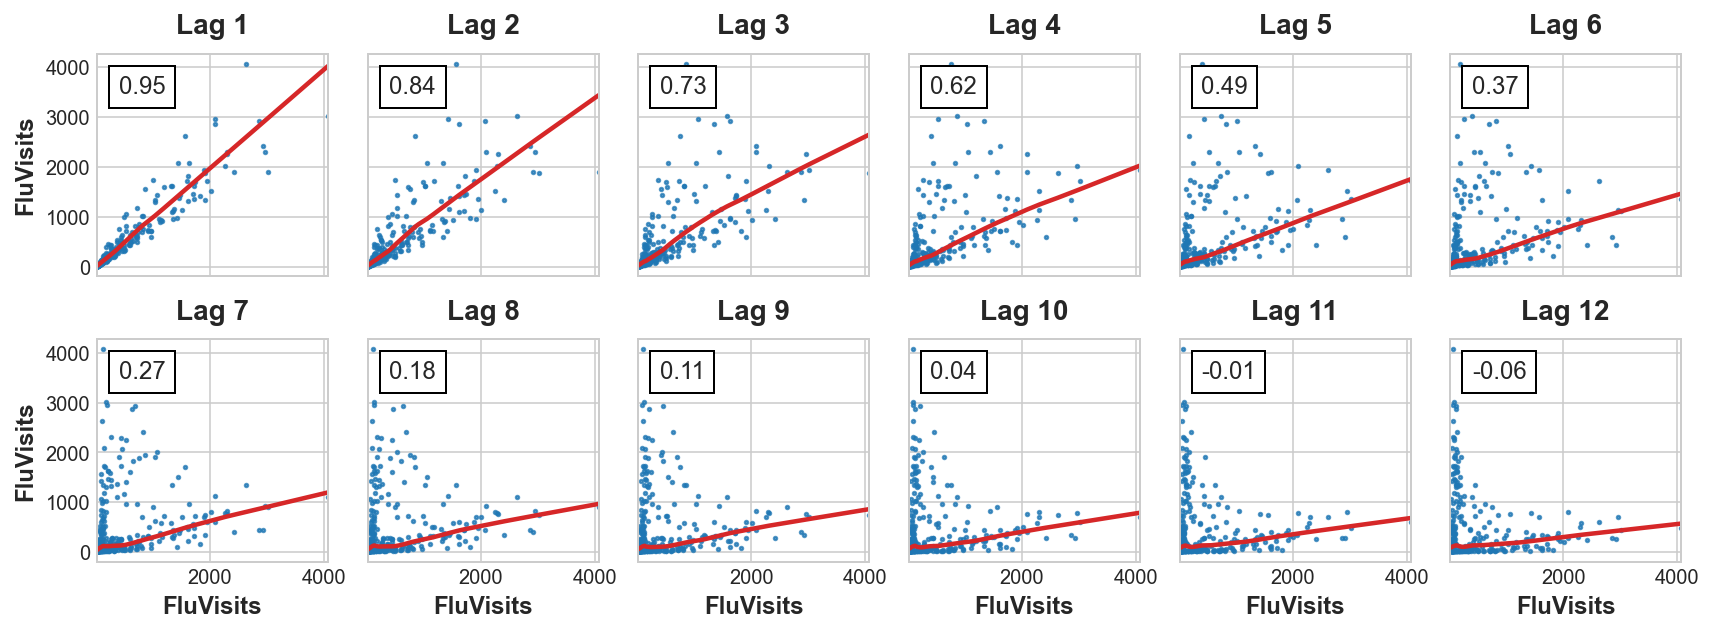

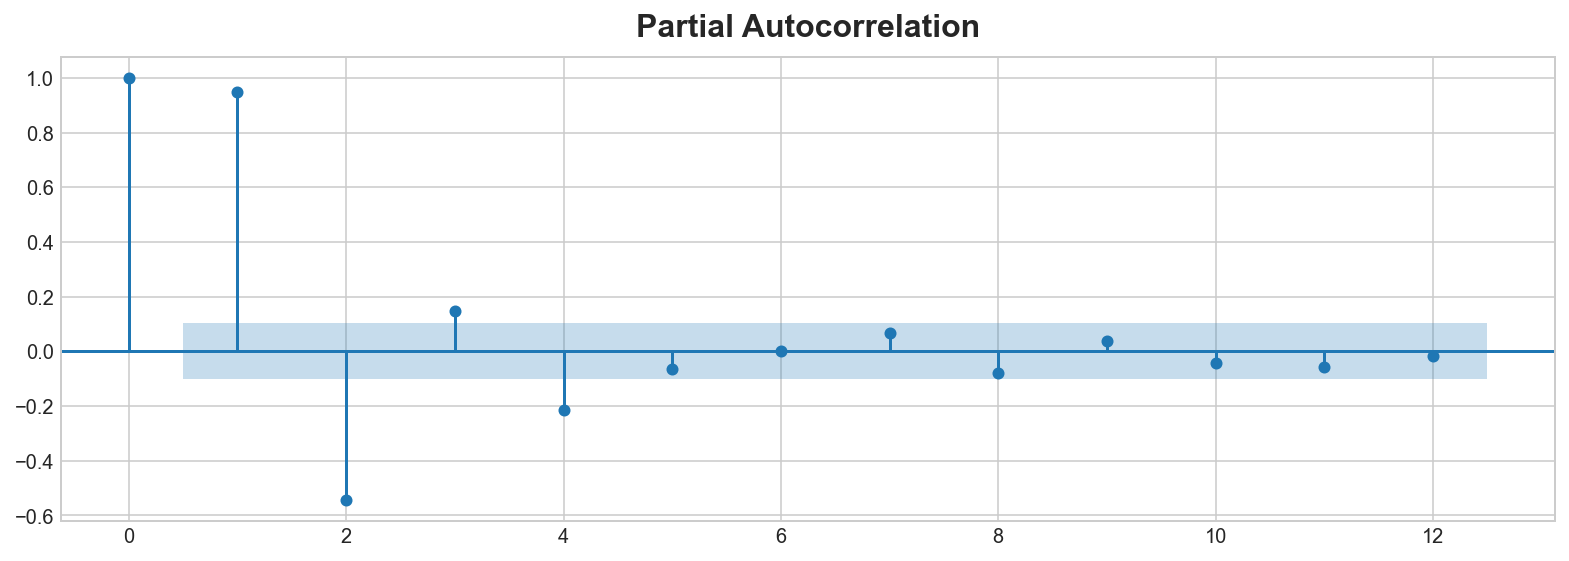

In [162]:
_ = plot_lags(flu_trends.FluVisits, lags=12, nrows=2)
_ = plot_pacf(flu_trends.FluVisits, lags=12)

The lag plots indicate that the relationship of FluVisits to its lags is mostly linear, while the partial autocorrelations suggest the dependence can be captured using lags 1, 2, 3, and 4. We can lag a time series in Pandas with the shift method. For this problem, we'll fill in the missing values the lagging creates with 0.0.

In [163]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(flu_trends.FluVisits, lags=4)
X = X.fillna(0.0)

In [164]:
X

y_lag_1  y_lag_2  y_lag_3  y_lag_4
Week                                                     
2009-06-29/2009-07-05      0.0      0.0      0.0      0.0
2009-07-06/2009-07-12    180.0      0.0      0.0      0.0
2009-07-13/2009-07-19    115.0    180.0      0.0      0.0
2009-07-20/2009-07-26    132.0    115.0    180.0      0.0
2009-07-27/2009-08-02    109.0    132.0    115.0    180.0
...                        ...      ...      ...      ...
2016-05-30/2016-06-05    124.0    156.0    211.0    305.0
2016-06-06/2016-06-12     90.0    124.0    156.0    211.0
2016-06-13/2016-06-19     55.0     90.0    124.0    156.0
2016-06-20/2016-06-26     33.0     55.0     90.0    124.0
2016-06-27/2016-07-03     27.0     33.0     55.0     90.0

[366 rows x 4 columns]

In [165]:
X_test


y_lag_1  y_lag_2  y_lag_3  y_lag_4
Week                                                     
2014-08-25/2014-08-31     18.0     14.0     18.0     18.0
2014-09-01/2014-09-07     26.0     18.0     14.0     18.0
2014-09-08/2014-09-14     38.0     26.0     18.0     14.0
2014-09-15/2014-09-21     45.0     38.0     26.0     18.0
2014-09-22/2014-09-28     47.0     45.0     38.0     26.0
...                        ...      ...      ...      ...
2016-04-11/2016-04-17    712.0    955.0   1100.0   1326.0
2016-04-18/2016-04-24    616.0    712.0    955.0   1100.0
2016-04-25/2016-05-01    578.0    616.0    712.0    955.0
2016-05-02/2016-05-08    455.0    578.0    616.0    712.0
2016-05-09/2016-05-15    305.0    455.0    578.0    616.0

[90 rows x 4 columns]

In [166]:
# Create target series and data splits
y = flu_trends.FluVisits.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

In [168]:
train_rmse = mean_squared_error(y_train, y_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_fore, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

Train RMSE: 176.79
Test RMSE: 78.52


In [104]:
r2_score(y_train,y_pred)


0.9259865555423605

In [87]:
r2_score(y_test,y_fore)

0.9560578099251688

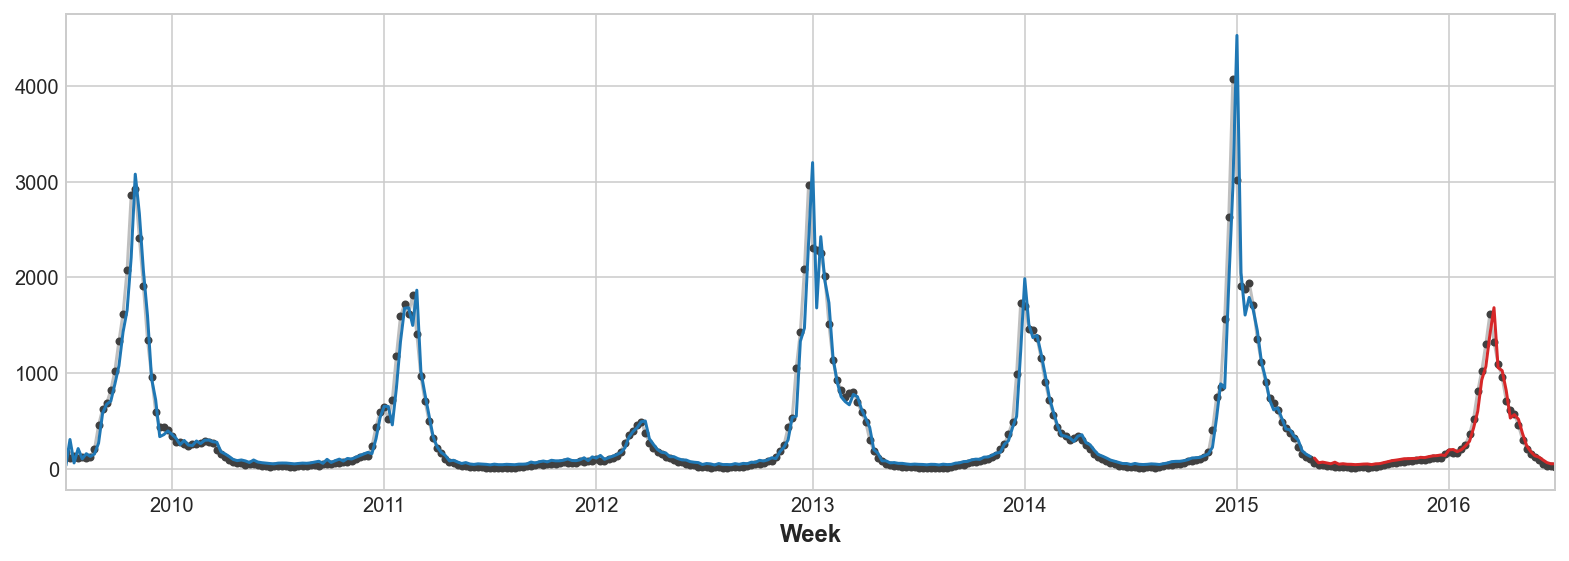

In [60]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

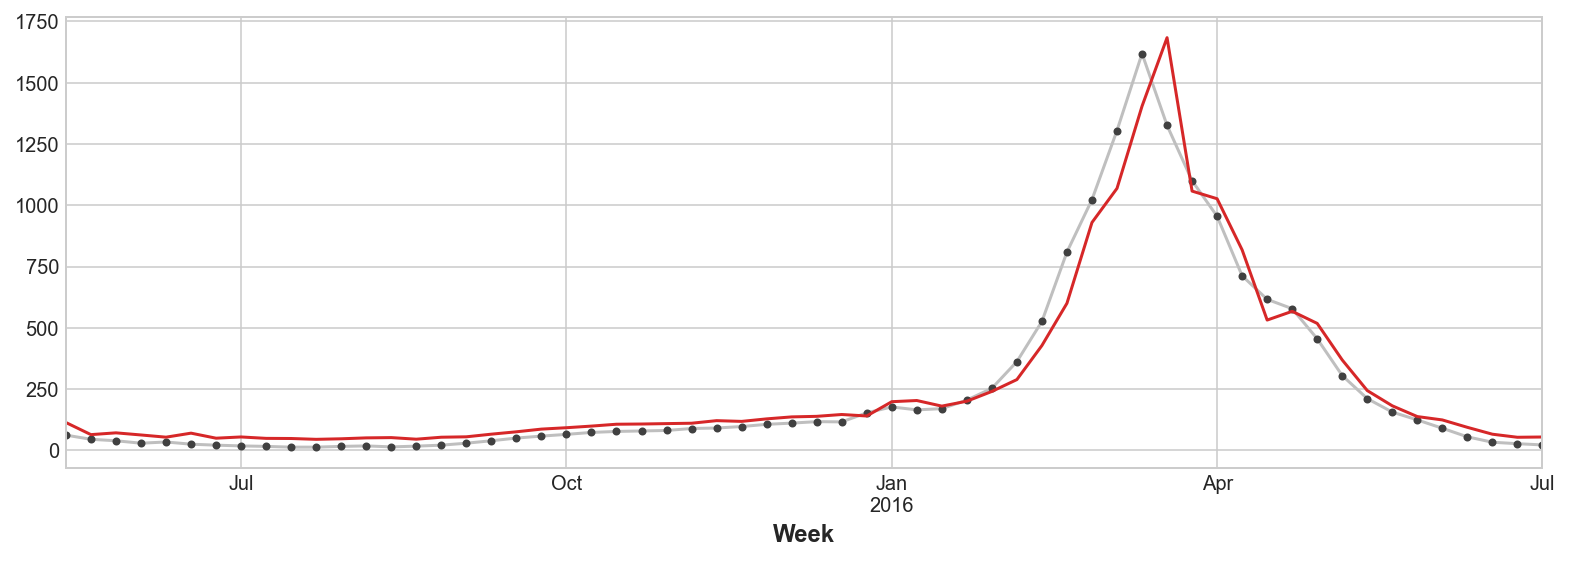

In [61]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

To improve the forecast we could try to find leading indicators, time series that could provide an "early warning" for changes in flu cases. For our second approach then we'll add to our training data the popularity of some flu-related search terms as measured by Google Trends.

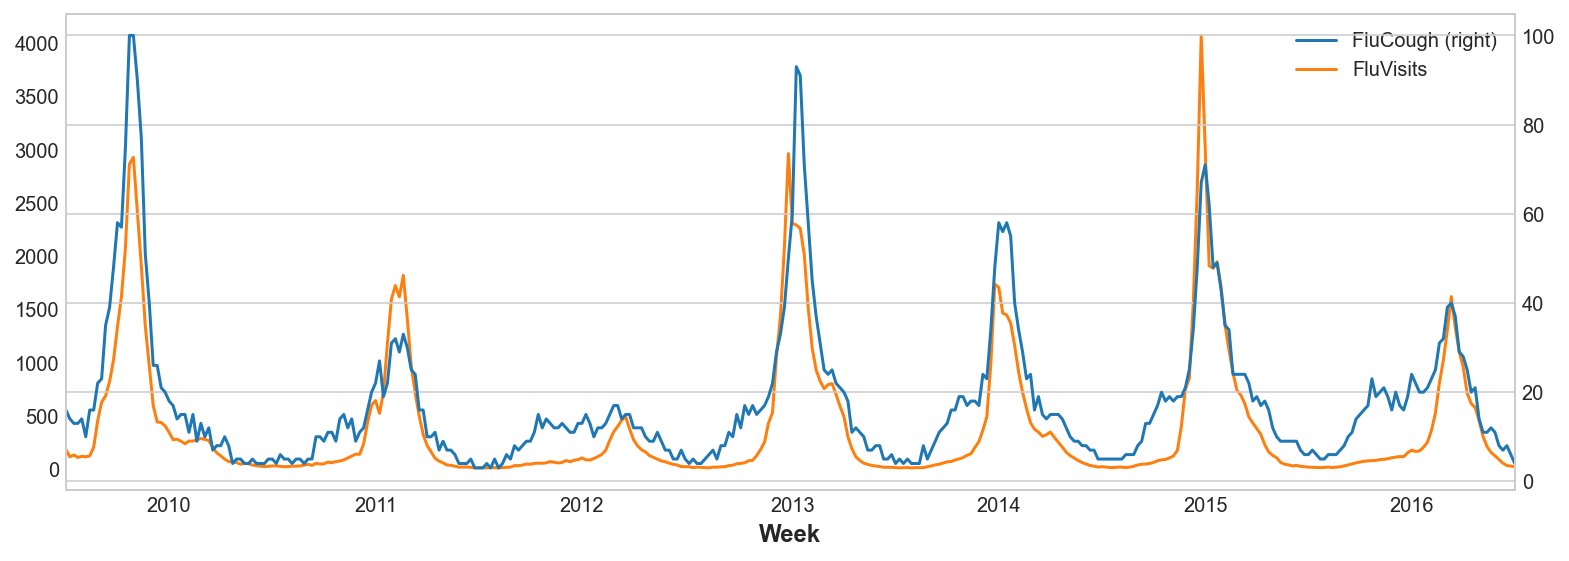

In [62]:
ax = flu_trends.plot(
    y=["FluCough", "FluVisits"],
    secondary_y="FluCough",
)

In [63]:
flu_trends.head()

AInfluenza  AcuteBronchitis  BodyTemperature  \
Week                                                                  
2009-06-29/2009-07-05          36               20               43   
2009-07-06/2009-07-12          25               19               40   
2009-07-13/2009-07-19          24               30               45   
2009-07-20/2009-07-26          23               19               40   
2009-07-27/2009-08-02          27               21               44   

                       BraunThermoscan  BreakAFever  Bronchitis  ChestCold  \
Week                                                                         
2009-06-29/2009-07-05               27           11          22         16   
2009-07-06/2009-07-12               31           10          21         11   
2009-07-13/2009-07-19               20           12          20         20   
2009-07-20/2009-07-26               15           10          19         12   
2009-07-27/2009-08-02               20           11          19         17   

                       ColdAndFlu  ColdOrFlu  ColdVersusFlu  ...  \
Week                                                         ...   
2009-06-29/2009-07-05           7          3              8  ...   
2009-07-06/2009-07-12           6          8              8  ...   
2009-07-13/2009-07-19           6          6              8  ...   
2009-07-20/2009-07-26           7         10             15  ...   
2009-07-27/2009-08-02           8         10             15  ...   

                       TreatingTheFlu  TreatmentForFlu  TreatmentForTheFlu  \
Week                                                                         
2009-06-29/2009-07-05              16                6                  13   
2009-07-06/2009-07-12              16                7                   8   
2009-07-13/2009-07-19              16                6                   9   
2009-07-20/2009-07-26               8                5                  12   
2009-07-27/2009-08-02               8                8                  12   

                       Tussin  Tussionex  TypeAInfluenza  UpperRespiratory  \
Week                                                                         
2009-06-29/2009-07-05      25         34              30                25   
2009-07-06/2009-07-12      27         32              27                28   
2009-07-13/2009-07-19      24         28              25                25   
2009-07-20/2009-07-26      21         26              26                29   
2009-07-27/2009-08-02      33         29              21                27   

                       WalkingPneumonia  WhatToDoIfYouHaveTheFlu  FluVisits  
Week                                                                         
2009-06-29/2009-07-05                24                       15        180  
2009-07-06/2009-07-12                29                        9        115  
2009-07-13/2009-07-19                25                        9        132  
2009-07-20/2009-07-26                24                       13        109  
2009-07-27/2009-08-02                30                        9        120  

[5 rows x 130 columns]

In [64]:
search_terms = ["FluContagious", "FluCough", "FluFever", "InfluenzaA", "TreatFlu", "IHaveTheFlu", "OverTheCounterFlu", "HowLongFlu"]

# Create three lags for each search term
X0 = make_lags(flu_trends[search_terms], lags=3)

# Create four lags for the target, as before
X1 = make_lags(flu_trends['FluVisits'], lags=4)

# Combine to create the training data
X = pd.concat([X0, X1], axis=1).fillna(0.0)

In [65]:
X

(y_lag_1, FluContagious)  (y_lag_1, FluCough)  \
Week                                                                   
2009-06-29/2009-07-05                       0.0                  0.0   
2009-07-06/2009-07-12                       5.0                 16.0   
2009-07-13/2009-07-19                       6.0                 14.0   
2009-07-20/2009-07-26                       6.0                 13.0   
2009-07-27/2009-08-02                       5.0                 13.0   
...                                         ...                  ...   
2016-05-30/2016-06-05                       5.0                 11.0   
2016-06-06/2016-06-12                       4.0                  8.0   
2016-06-13/2016-06-19                       3.0                  7.0   
2016-06-20/2016-06-26                       3.0                  8.0   
2016-06-27/2016-07-03                       3.0                  6.0   

                       (y_lag_1, FluFever)  (y_lag_1, InfluenzaA)  \
Week                                                                
2009-06-29/2009-07-05                  0.0                    0.0   
2009-07-06/2009-07-12                 15.0                   36.0   
2009-07-13/2009-07-19                 15.0                   25.0   
2009-07-20/2009-07-26                 13.0                   24.0   
2009-07-27/2009-08-02                 12.0                   23.0   
...                                    ...                    ...   
2016-05-30/2016-06-05                 10.0                    6.0   
2016-06-06/2016-06-12                 11.0                    5.0   
2016-06-13/2016-06-19                  9.0                    5.0   
2016-06-20/2016-06-26                  8.0                    4.0   
2016-06-27/2016-07-03                  8.0                    3.0   

                       (y_lag_1, TreatFlu)  (y_lag_1, IHaveTheFlu)  \
Week                                                                 
2009-06-29/2009-07-05                  0.0                     0.0   
2009-07-06/2009-07-12                  6.0                     5.0   
2009-07-13/2009-07-19                 12.0                     7.0   
2009-07-20/2009-07-26                  8.0                     8.0   
2009-07-27/2009-08-02                  5.0                     4.0   
...                                    ...                     ...   
2016-05-30/2016-06-05                  6.0                    11.0   
2016-06-06/2016-06-12                  5.0                     9.0   
2016-06-13/2016-06-19                  5.0                     8.0   
2016-06-20/2016-06-26                  5.0                     7.0   
2016-06-27/2016-07-03                  4.0                     5.0   

                       (y_lag_1, OverTheCounterFlu)  (y_lag_1, HowLongFlu)  \
Week                                                                         
2009-06-29/2009-07-05                           0.0                    0.0   
2009-07-06/2009-07-12                          11.0                    6.0   
2009-07-13/2009-07-19                           7.0                    7.0   
2009-07-20/2009-07-26                           7.0                    7.0   
2009-07-27/2009-08-02                           6.0                    6.0   
...                                             ...                    ...   
2016-05-30/2016-06-05                           9.0                    6.0   
2016-06-06/2016-06-12                           6.0                    6.0   
2016-06-13/2016-06-19                           5.0                    6.0   
2016-06-20/2016-06-26                           6.0                    5.0   
2016-06-27/2016-07-03                           4.0                    5.0   

                       (y_lag_2, FluContagious)  (y_lag_2, FluCough)  ...  \
Week                                                                  ...   
2009-06-29/2009-07-05                       0.0                  0.0  ...   
2009-07-06/2009-07-12          

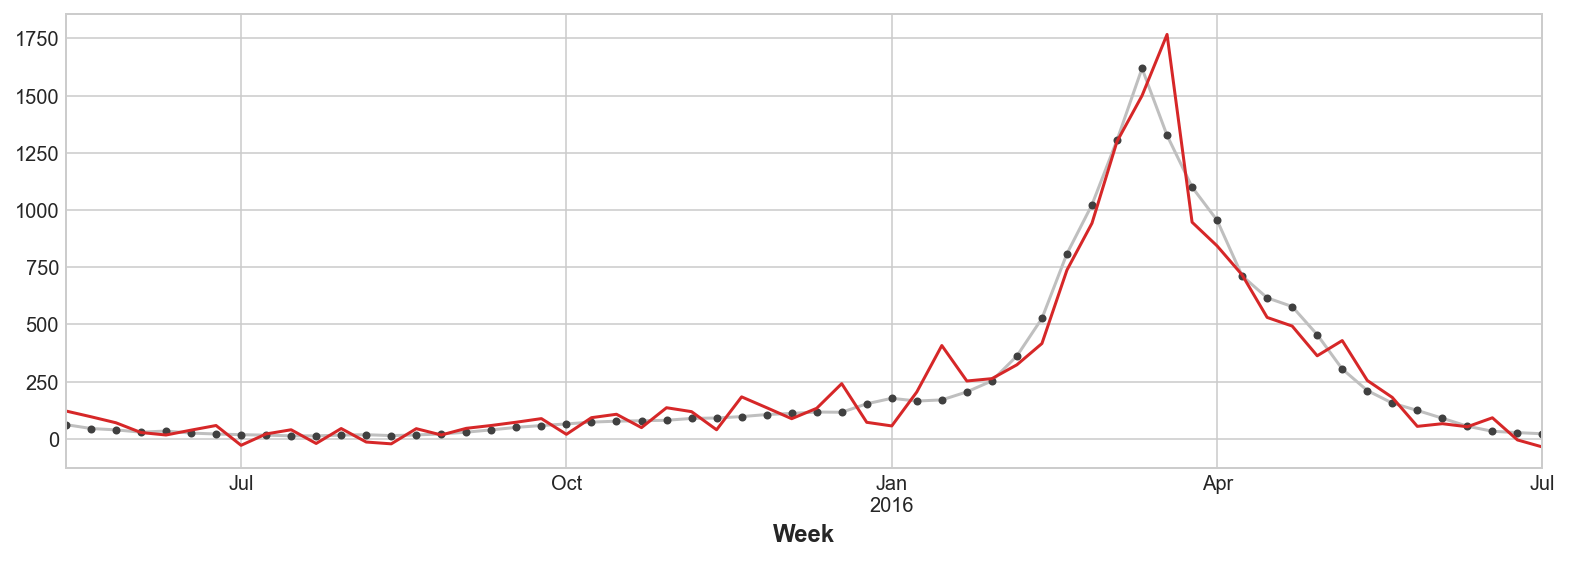

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

# hybrid models

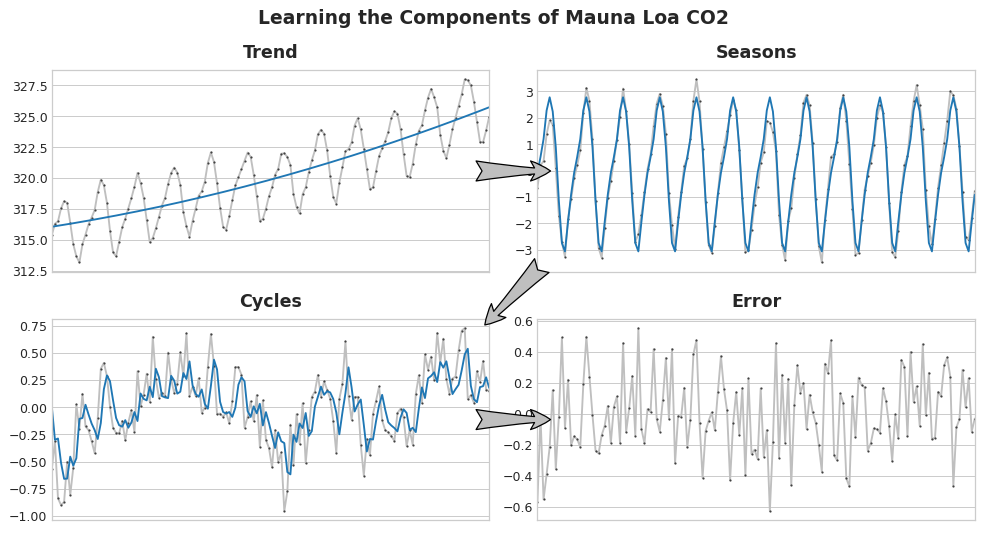

In [67]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from xgboost import XGBRegressor
simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

In [68]:
industries = ["BuildingMaterials", "FoodAndBeverage"]
retail = pd.read_csv("F:\\mohamed\\Machine Learning 2\\time series\\us-retail-sales..csv",
    usecols=['Month'] + industries,
    parse_dates=['Month'],
    index_col='Month',
).to_period('D').reindex(columns=industries)
retail = pd.concat({'Sales': retail}, names=[None, 'Industries'], axis=1)

retail.head()

Sales                
Industries BuildingMaterials FoodAndBeverage
Month                                       
1992-01-01              8964           29589
1992-02-01              9023           28570
1992-03-01             10608           29682
1992-04-01             11630           30228
1992-05-01             12327           31677

In [69]:
y = retail.copy()

In [70]:
y

Sales                
Industries BuildingMaterials FoodAndBeverage
Month                                       
1992-01-01              8964           29589
1992-02-01              9023           28570
1992-03-01             10608           29682
1992-04-01             11630           30228
1992-05-01             12327           31677
...                      ...             ...
2019-08-01             32375           66937
2019-09-01             29963           62420
2019-10-01             32629           64849
2019-11-01             29793           66363
2019-12-01             28621           70028

[336 rows x 2 columns]

In [71]:
dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    constant=True,  # the intercept
    order=2,        # quadratic trend
    drop=True,      # drop terms to avoid collinearity
)
X = dp.in_sample() 

In [72]:
X

const  trend  trend_squared
Month                                  
1992-01-01    1.0    1.0            1.0
1992-02-01    1.0    2.0            4.0
1992-03-01    1.0    3.0            9.0
1992-04-01    1.0    4.0           16.0
1992-05-01    1.0    5.0           25.0
...           ...    ...            ...
2019-08-01    1.0  332.0       110224.0
2019-09-01    1.0  333.0       110889.0
2019-10-01    1.0  334.0       111556.0
2019-11-01    1.0  335.0       112225.0
2019-12-01    1.0  336.0       112896.0

[336 rows x 3 columns]

In [73]:
idx_train, idx_test = train_test_split(y.index, test_size=12 * 4, shuffle=False,)
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]


In [74]:
# Fit trend model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Make predictions
y_fit = pd.DataFrame(
    model.predict(X_train),
    index=y_train.index,
    columns=y_train.columns,
)
y_pred = pd.DataFrame(
    model.predict(X_test),
    index=y_test.index,
    columns=y_test.columns,
)


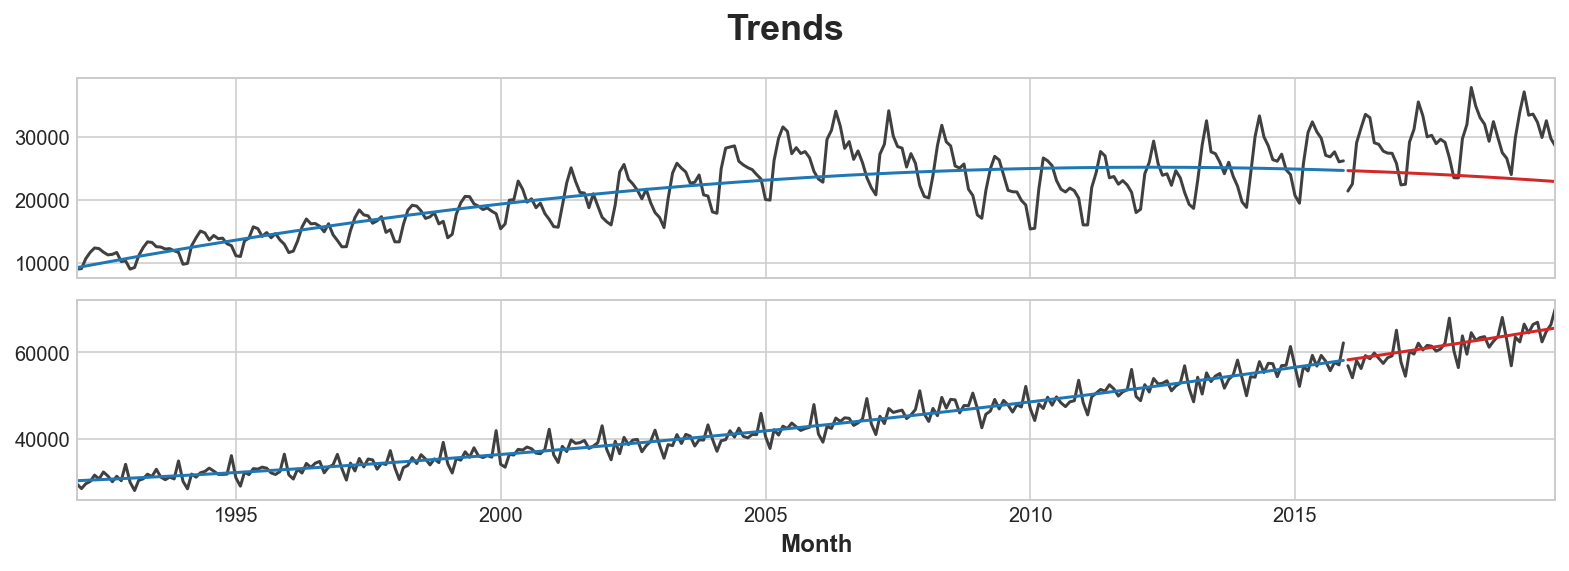

In [75]:
# Plot
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.25', subplots=True, sharex=True, ax=axs)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle("Trends")

While the linear regression algorithm is capable of multi-output regression, the XGBoost algorithm is not. To predict multiple series at once with XGBoost, we'll instead convert these series from wide format, with one time series per column, to long format, with series indexed by categories along rows.

In [76]:
# The `stack` method converts column labels to row labels, pivoting from wide format to long
X = retail.stack()  # pivot dataset wide to long
display(X.head())
y = X.pop('Sales')  # grab target series

Sales
Month      Industries              
1992-01-01 BuildingMaterials   8964
           FoodAndBeverage    29589
1992-02-01 BuildingMaterials   9023
           FoodAndBeverage    28570
1992-03-01 BuildingMaterials  10608

So that XGBoost can learn to distinguish our two time series, we'll turn the row labels for 'Industries' into a categorical feature with a label encoding. We'll also create a feature for annual seasonality by pulling the month numbers out of the time index.

In [77]:
# Turn row labels into categorical feature columns with a label encoding
X = X.reset_index('Industries')
# Label encoding for 'Industries' feature
for colname in X.select_dtypes(["object", "category"]):
    X[colname], _ = X[colname].factorize()

# Label encoding for annual seasonality
X["Month"] = X.index.month  # values are 1, 2, ..., 12

# Create splits
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]

Now we'll convert the trend predictions made earlier to long format and then subtract them from the original series. That will give us detrended (residual) series that XGBoost can learn.

In [78]:
# Pivot wide to long (stack) and convert DataFrame to Series (squeeze)
y_fit = y_fit.stack().squeeze()    # trend from training set
y_pred = y_pred.stack().squeeze()  # trend from test set

In [79]:
# Create residuals (the collection of detrended series) from the training set
y_resid = y_train - y_fit

In [80]:
# Train XGBoost on the residuals
xgb = XGBRegressor()
xgb.fit(X_train, y_resid)

# Add the predicted residuals onto the predicted trends
y_fit_boosted = xgb.predict(X_train) + y_fit
y_pred_boosted = xgb.predict(X_test) + y_pred

The fit appears quite good, though we can see how the trend learned by XGBoost is only as good as the trend learned by the linear regression -- in particular, XGBoost wasn't able to compensate for the poorly fit trend in the 'BuildingMaterials' series.

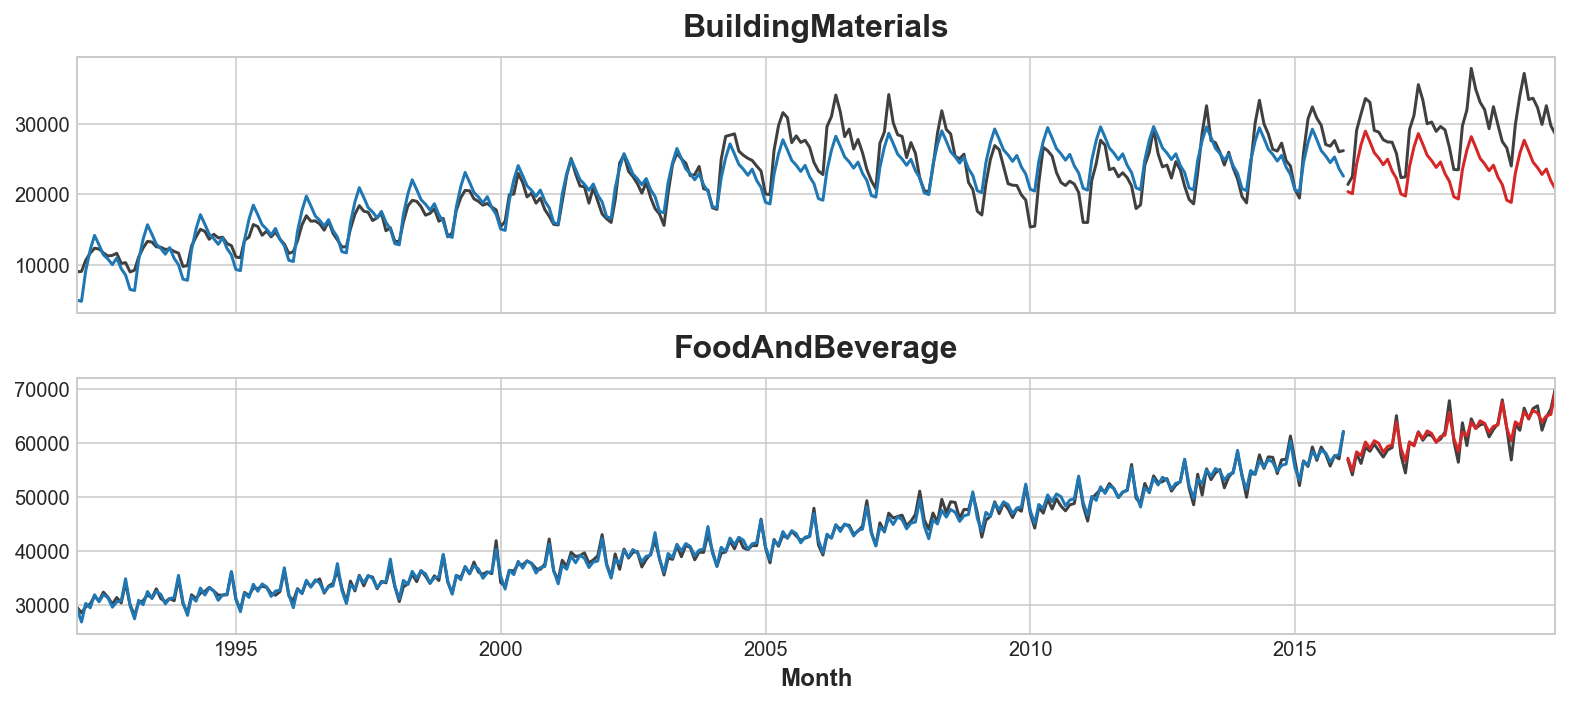

In [81]:
axs = y_train.unstack(['Industries']).plot(
    color='0.25', figsize=(11, 5), subplots=True, sharex=True,
    title=['BuildingMaterials', 'FoodAndBeverage'],
)
axs = y_test.unstack(['Industries']).plot(
    color='0.25', subplots=True, sharex=True, ax=axs,
)
axs = y_fit_boosted.unstack(['Industries']).plot(
    color='C0', subplots=True, sharex=True, ax=axs,
)
axs = y_pred_boosted.unstack(['Industries']).plot(
    color='C3', subplots=True, sharex=True, ax=axs,
)
for ax in axs: ax.legend([])

# Last step

In Lessons 2 and 3, we treated forecasting as a simple regression problem with all of our features derived from a single input, the time index. We could easily create forecasts for any time in the future by just generating our desired trend and seasonal features.

When we added lag features in Lesson 4, however, the nature of the problem changed. Lag features require that the lagged target value is known at the time being forecast. A lag 1 feature shifts the time series forward 1 step, which means you could forecast 1 step into the future but not 2 steps.

In Lesson 4, we just assumed that we could always generate lags up to the period we wanted to forecast (every prediction was for just one step forward, in other words). Real-world forecasting typically demands more than this, so in this lesson we'll learn how to make forecasts for a variety of situations.

Defining the Forecasting Task¶
There are two things to establish before designing a forecasting model:

what information is available at the time a forecast is made (features),
and,
the time period during which you require forecasted values (target).

In [ ]:
The forecast origin is time at which you are making a forecast. Practically, you might consider the forecast origin to be the last time for which you have training data for the time being predicted. Everything up to he origin can be used to create features.

The forecast horizon is the time for which you are making a forecast. We often describe a forecast by the number of time steps in its horizon: a "1-step" forecast or "5-step" forecast, say. The forecast horizon describes the target.

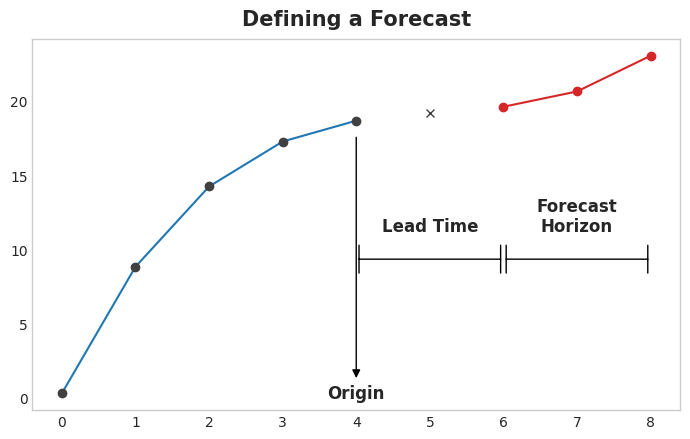

The time between the origin and the horizon is the lead time (or sometimes latency) of the forecast. A forecast's lead time is described by the number of steps from origin to horizon: a "1-step ahead" or "3-step ahead" forecast, say. In practice, it may be necessary for a forecast to begin multiple steps ahead of the origin because of delays in data acquisition or processing.

In [91]:
import numpy as np
import pandas as pd

N = 20
ts = pd.Series(
    np.arange(N),
    index=pd.period_range(start='2010', freq='A', periods=N, name='Year'),
    dtype=pd.Int8Dtype,
)

In [92]:
# Lag features
X = pd.DataFrame({
    'y_lag_2': ts.shift(2),
    'y_lag_3': ts.shift(3),
    'y_lag_4': ts.shift(4),
    'y_lag_5': ts.shift(5),
    'y_lag_6': ts.shift(6),    
})

In [93]:
X

y_lag_2 y_lag_3 y_lag_4 y_lag_5 y_lag_6
Year                                        
2010     NaN     NaN     NaN     NaN     NaN
2011     NaN     NaN     NaN     NaN     NaN
2012       0     NaN     NaN     NaN     NaN
2013       1       0     NaN     NaN     NaN
2014       2       1       0     NaN     NaN
2015       3       2       1       0     NaN
2016       4       3       2       1       0
2017       5       4       3       2       1
2018       6       5       4       3       2
2019       7       6       5       4       3
2020       8       7       6       5       4
2021       9       8       7       6       5
2022      10       9       8       7       6
2023      11      10       9       8       7
2024      12      11      10       9       8
2025      13      12      11      10       9
2026      14      13      12      11      10
2027      15      14      13      12      11
2028      16      15      14      13      12
2029      17      16      15      14      13

In [94]:
# Multistep targets
y = pd.DataFrame({
    'y_step_3': ts.shift(-2),
    'y_step_2': ts.shift(-1),
    'y_step_1': ts,
})

In [95]:
y

y_step_3 y_step_2 y_step_1
Year                           
2010        2        1        0
2011        3        2        1
2012        4        3        2
2013        5        4        3
2014        6        5        4
2015        7        6        5
2016        8        7        6
2017        9        8        7
2018       10        9        8
2019       11       10        9
2020       12       11       10
2021       13       12       11
2022       14       13       12
2023       15       14       13
2024       16       15       14
2025       17       16       15
2026       18       17       16
2027       19       18       17
2028      NaN       19       18
2029      NaN      NaN       19

In [98]:
data = pd.concat({'Targets': y, 'Features': X}, axis=1)

data.head(10).style.set_properties(['Targets'], **{'background-color': 'LavenderBlush'}) \
                   .set_properties(['Features'], **{'background-color': 'Lavender'})

In [ ]:
multi step goal is to cure the latency due to lead time

***

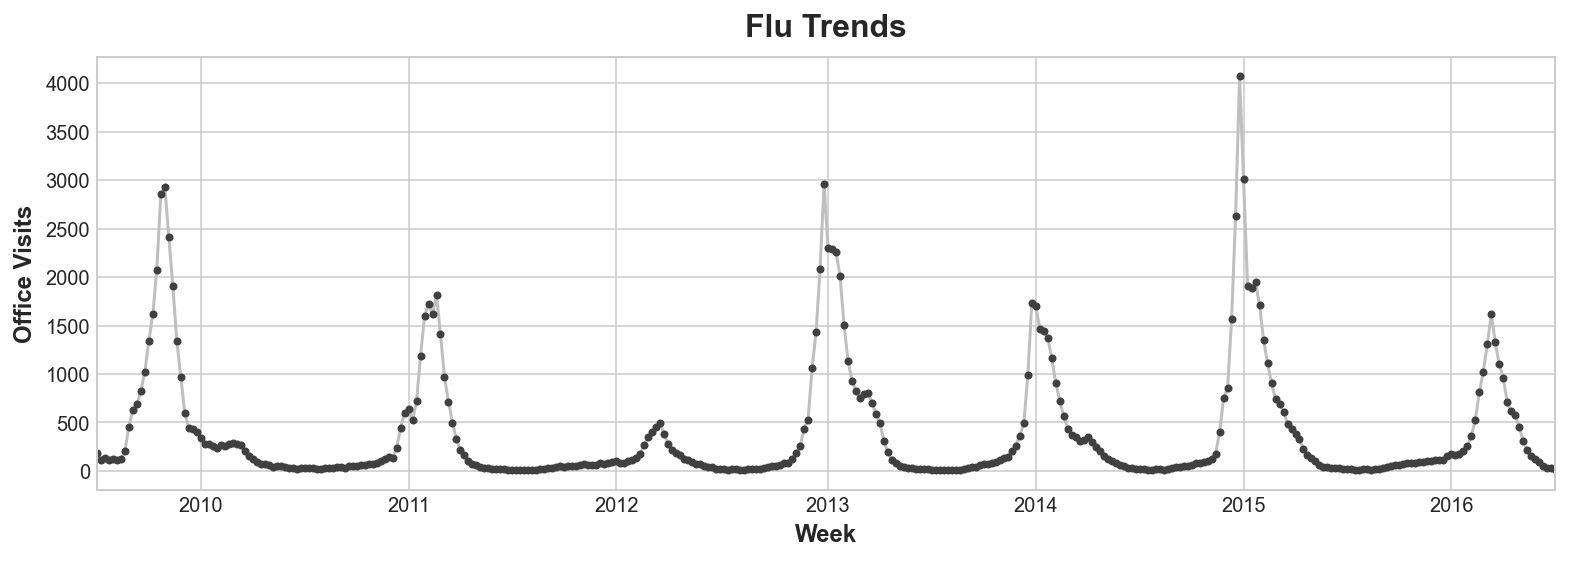

In [183]:
df=pd.read_csv("F:\\mohamed\\Machine Learning 2\\time series\\flu-trends.csv.csv")
flu_trends = df
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")

In [184]:
def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)

In [185]:
y = flu_trends.FluVisits.copy()
X = make_lags(y, lags=4).fillna(0.0)

In [186]:
X

y_lag_1  y_lag_2  y_lag_3  y_lag_4
Week                                                     
2009-06-29/2009-07-05      0.0      0.0      0.0      0.0
2009-07-06/2009-07-12    180.0      0.0      0.0      0.0
2009-07-13/2009-07-19    115.0    180.0      0.0      0.0
2009-07-20/2009-07-26    132.0    115.0    180.0      0.0
2009-07-27/2009-08-02    109.0    132.0    115.0    180.0
...                        ...      ...      ...      ...
2016-05-30/2016-06-05    124.0    156.0    211.0    305.0
2016-06-06/2016-06-12     90.0    124.0    156.0    211.0
2016-06-13/2016-06-19     55.0     90.0    124.0    156.0
2016-06-20/2016-06-26     33.0     55.0     90.0    124.0
2016-06-27/2016-07-03     27.0     33.0     55.0     90.0

[366 rows x 4 columns]

In [187]:
y

Week
2009-06-29/2009-07-05    180
2009-07-06/2009-07-12    115
2009-07-13/2009-07-19    132
2009-07-20/2009-07-26    109
2009-07-27/2009-08-02    120
                        ... 
2016-05-30/2016-06-05     90
2016-06-06/2016-06-12     55
2016-06-13/2016-06-19     33
2016-06-20/2016-06-26     27
2016-06-27/2016-07-03     22
Freq: W-SUN, Name: FluVisits, Length: 366, dtype: int64

In [188]:
def make_multistep_target(ts, steps):
    
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)

In [189]:
# Eight-week forecast
y = make_multistep_target(y, steps=8).dropna()

In [190]:
y

y_step_1  y_step_2  y_step_3  y_step_4  y_step_5  \
Week                                                                      
2009-06-29/2009-07-05       180     115.0     132.0     109.0     120.0   
2009-07-06/2009-07-12       115     132.0     109.0     120.0     115.0   
2009-07-13/2009-07-19       132     109.0     120.0     115.0     123.0   
2009-07-20/2009-07-26       109     120.0     115.0     123.0     205.0   
2009-07-27/2009-08-02       120     115.0     123.0     205.0     454.0   
...                         ...       ...       ...       ...       ...   
2016-04-11/2016-04-17       616     578.0     455.0     305.0     211.0   
2016-04-18/2016-04-24       578     455.0     305.0     211.0     156.0   
2016-04-25/2016-05-01       455     305.0     211.0     156.0     124.0   
2016-05-02/2016-05-08       305     211.0     156.0     124.0      90.0   
2016-05-09/2016-05-15       211     156.0     124.0      90.0      55.0   

                       y_step_6  y_step_7  y_step_8  
Week                                                 
2009-06-29/2009-07-05     115.0     123.0     205.0  
2009-07-06/2009-07-12     123.0     205.0     454.0  
2009-07-13/2009-07-19     205.0     454.0     628.0  
2009-07-20/2009-07-26     454.0     628.0     687.0  
2009-07-27/2009-08-02     628.0     687.0     821.0  
...                         ...       ...       ...  
2016-04-11/2016-04-17     156.0     124.0      90.0  
2016-04-18/2016-04-24     124.0      90.0      55.0  
2016-04-25/2016-05-01      90.0      55.0      33.0  
2016-05-02/2016-05-08      55.0      33.0      27.0  
2016-05-09/2016-05-15      33.0      27.0      22.0  

[359 rows x 8 columns]

In [191]:
# Shifting has created indexes that don't match. Only keep times for
# which we have both targets and features.
y, X = y.align(X, join='inner', axis=0)

In [192]:
X

y_lag_1  y_lag_2  y_lag_3  y_lag_4
Week                                                     
2009-06-29/2009-07-05      0.0      0.0      0.0      0.0
2009-07-06/2009-07-12    180.0      0.0      0.0      0.0
2009-07-13/2009-07-19    115.0    180.0      0.0      0.0
2009-07-20/2009-07-26    132.0    115.0    180.0      0.0
2009-07-27/2009-08-02    109.0    132.0    115.0    180.0
...                        ...      ...      ...      ...
2016-04-11/2016-04-17    712.0    955.0   1100.0   1326.0
2016-04-18/2016-04-24    616.0    712.0    955.0   1100.0
2016-04-25/2016-05-01    578.0    616.0    712.0    955.0
2016-05-02/2016-05-08    455.0    578.0    616.0    712.0
2016-05-09/2016-05-15    305.0    455.0    578.0    616.0

[359 rows x 4 columns]

In [193]:
y

y_step_1  y_step_2  y_step_3  y_step_4  y_step_5  \
Week                                                                      
2009-06-29/2009-07-05       180     115.0     132.0     109.0     120.0   
2009-07-06/2009-07-12       115     132.0     109.0     120.0     115.0   
2009-07-13/2009-07-19       132     109.0     120.0     115.0     123.0   
2009-07-20/2009-07-26       109     120.0     115.0     123.0     205.0   
2009-07-27/2009-08-02       120     115.0     123.0     205.0     454.0   
...                         ...       ...       ...       ...       ...   
2016-04-11/2016-04-17       616     578.0     455.0     305.0     211.0   
2016-04-18/2016-04-24       578     455.0     305.0     211.0     156.0   
2016-04-25/2016-05-01       455     305.0     211.0     156.0     124.0   
2016-05-02/2016-05-08       305     211.0     156.0     124.0      90.0   
2016-05-09/2016-05-15       211     156.0     124.0      90.0      55.0   

                       y_step_6  y_step_7  y_step_8  
Week                                                 
2009-06-29/2009-07-05     115.0     123.0     205.0  
2009-07-06/2009-07-12     123.0     205.0     454.0  
2009-07-13/2009-07-19     205.0     454.0     628.0  
2009-07-20/2009-07-26     454.0     628.0     687.0  
2009-07-27/2009-08-02     628.0     687.0     821.0  
...                         ...       ...       ...  
2016-04-11/2016-04-17     156.0     124.0      90.0  
2016-04-18/2016-04-24     124.0      90.0      55.0  
2016-04-25/2016-05-01      90.0      55.0      33.0  
2016-05-02/2016-05-08      55.0      33.0      27.0  
2016-05-09/2016-05-15      33.0      27.0      22.0  

[359 rows x 8 columns]

In [194]:
# Create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

In [195]:
train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

Train RMSE: 389.12
Test RMSE: 582.33


In [196]:
def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax



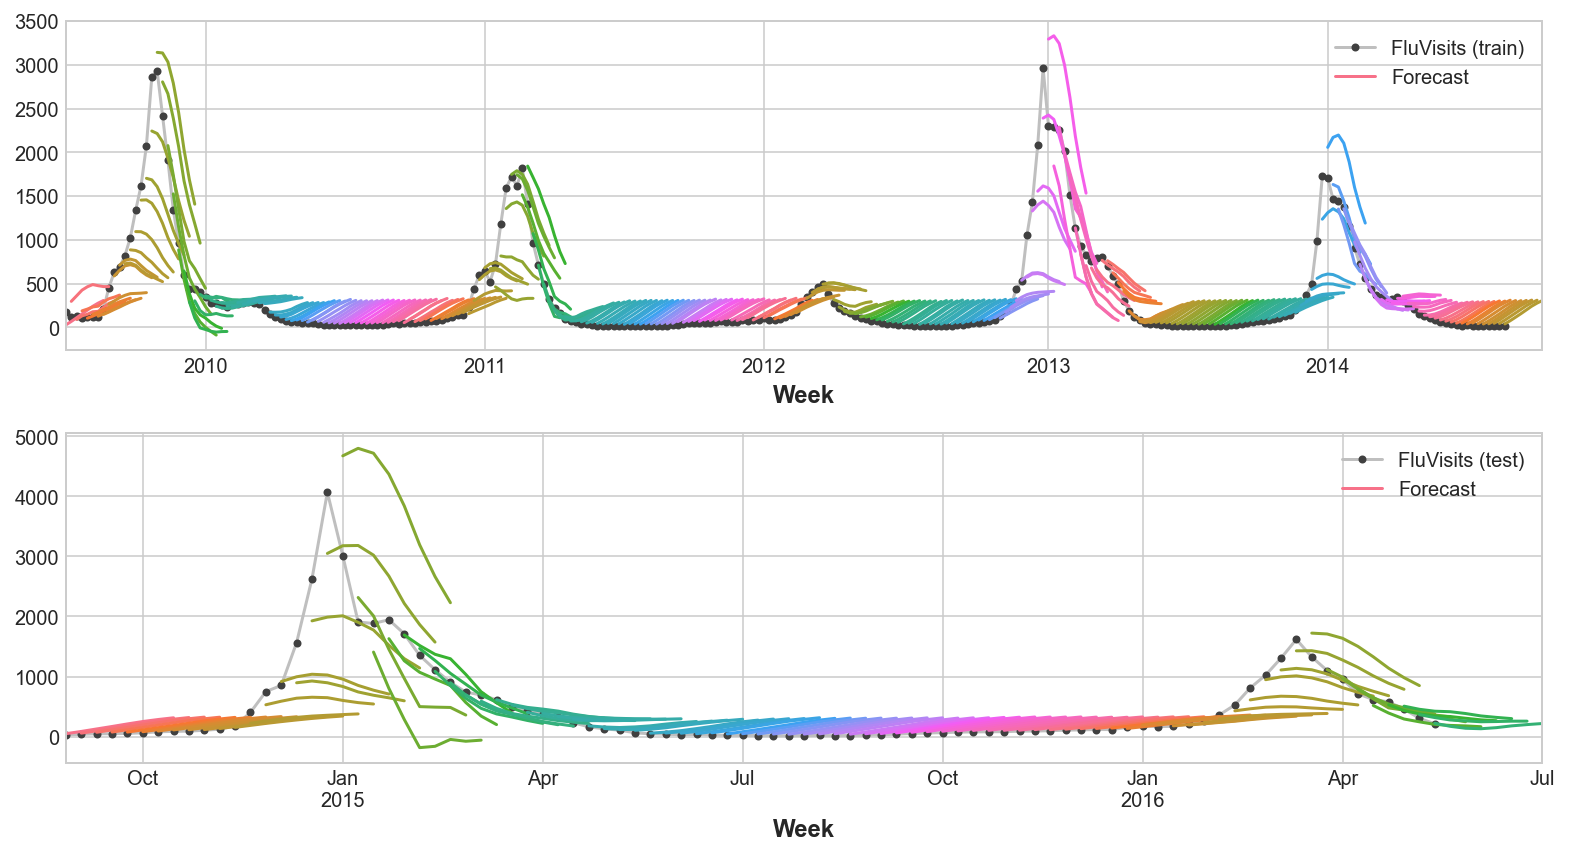

In [197]:
palette = dict(palette='husl', n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
ax1 = flu_trends.FluVisits[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['FluVisits (train)', 'Forecast'])
ax2 = flu_trends.FluVisits[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['FluVisits (test)', 'Forecast'])

`Direct strategy`
-
`XGBoost` can't produce multiple outputs for regression tasks. But by applying the Direct reduction strategy, we can still use it to produce multi-step forecasts. This is as easy as wrapping it with `scikit-learn's` `MultiOutputRegressor`.

In [199]:
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(XGBRegressor())
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

Train RMSE: 1.22
Test RMSE: 526.45


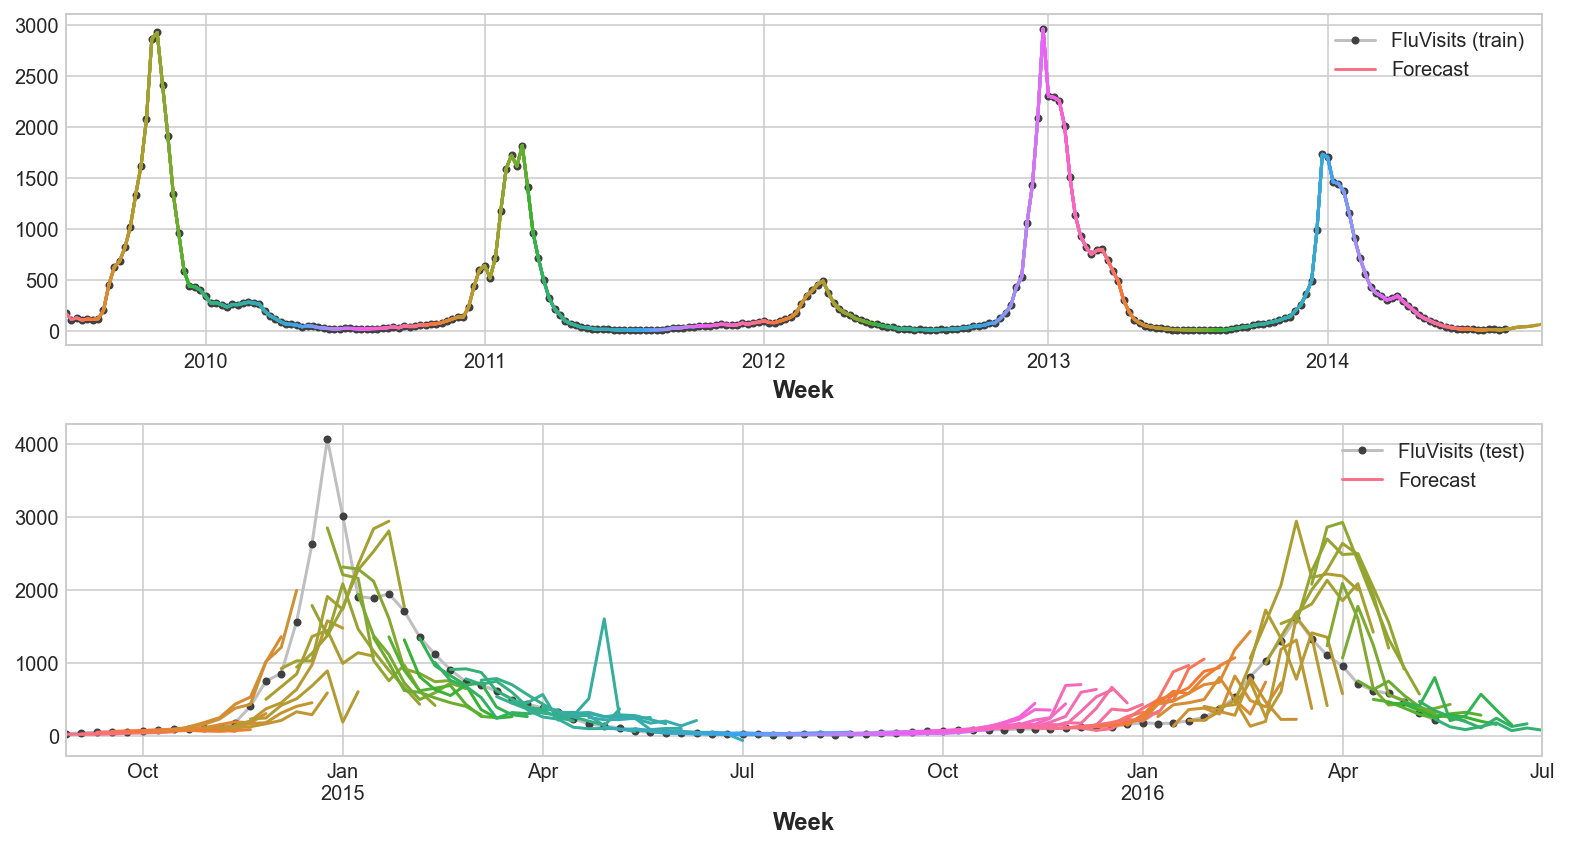

In [200]:
train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

palette = dict(palette='husl', n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
ax1 = flu_trends.FluVisits[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['FluVisits (train)', 'Forecast'])
ax2 = flu_trends.FluVisits[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['FluVisits (test)', 'Forecast'])

`XGBoost `here is clearly `overfitting `on the training set. But on the test set it seems it was able to capture some of the dynamics of the flu season better than the linear regression model. It would likely do even better with some `hyperparameter` tuning.